In [1]:
import pandas as pd
from os import walk
import matplotlib.pyplot as plt
from CritRole.Common import EDamageTypes
from CritRole.Common import validOrZero

globalData = {}
accmData = []

gindex = 0

def process_file(root, x, character):
    global gindex
    fileindex = x.split('.')[0].zfill(3)
#    if not x == "64.html.csv":# and not x == "44.html.csv" and not x == "33.html.csv":
#       return
    #print("Processing file: " + str(x))
    eviFrame = pd.read_csv(root + x, index_col=0);
    retable = eviFrame.index.values
    #print(eviFrame["PhysicalInstVals"][0:20])
    #eviFrame = eviFrame.loc[:, EDamageTypes[0]:EDamageTypes[len(EDamageTypes) - 1]+"Instances"]
    eviFrame = eviFrame.loc[:, EDamageTypes[0]:EDamageTypes[len(EDamageTypes) - 1]]
    eviFrame = eviFrame.iloc[[(character)]]
    #eviFrame = eviFrame.rename(index={1: gindex})
    eviFrame.index.name = "Episode"
    last = eviFrame.index[-1]
    eviFrame = eviFrame.rename(index={last: str(fileindex)})
    #eviFrame["Episode"] = fileindex
    gindex += 1
    # + eviFrame[2:8]
    #eviFrame = eviFrame.drop(['Trinket'])
    #print(eviFrame)
    
    #print(character)
    if len(accmData) > character:
        #accmData[0].append(eviFrame, ignore_index=True);
        accmData[character] = pd.concat([accmData[character], eviFrame]);
        #print(gindex)
        #print(accmData[0])
    else:
        accmData.append(eviFrame);
        #print(accmData[0])
        

    #print(eviFrame)
    #print(accmData)
#    print(eviFrame.shape[0])
    for i in range(0, len(EDamageTypes)):
        #print(eviFrame.columns[i]);
        dAgg = eviFrame[eviFrame.columns[i]];

        if EDamageTypes[i] in globalData:
            globalData[EDamageTypes[i]][0] += dAgg
        else:
            globalData[EDamageTypes[i]] = []
            globalData[EDamageTypes[i]].append(dAgg)
#        DamageAgg = eviFrame[''
    return retable
        
# Enumerate the folder
damageTakens = []
rootDirectory = "./ParsedDamageTaken/"
for (dirpath, dirnames, filenames) in walk(rootDirectory):
    damageTakens.extend(filenames)

chararr = []
    
for chars in range(0,7):
    for singleFile in damageTakens:
        chararr = process_file(rootDirectory, singleFile, chars)
        
    accmData[chars] = accmData[chars].sort_index()
    print("======= CHAR " + str(chars) + " ========")
    print(accmData[chars])
        
print("Done")


======= CHAR 0 ========
         Lightning  Poison  Fire  Falling  Radiant  Necrotic  Psychic  Ice  \
Episode                                                                      
001              0       0     0        0        0         0        0    0   
002              0       0     0        0        0         0        0    0   
003              0       0     0        0        0         0        0    0   
004              0       0     0        8        0         0        0    0   
005              0       0     0       36        0         0        0    0   
006              0       0     0        0        0         0        0    0   
007             36       7    12        0        0         0        0    0   
008              0       0     0        0        0         0        0    0   
009              0       0     0        0        0         0       22    0   
010              0       0    14        0        0         0        0    0   
011              0       0     0        

======= CHAR 2 ========
         Lightning  Poison  Fire  Falling  Radiant  Necrotic  Psychic  Ice  \
Episode                                                                      
001              0       0     0        0        0         0        0    0   
002             14       0     0        0        0         0        0    0   
003              0       0     0        0        0         0        0    0   
004              0       0     0        0        0         0        0    0   
005              0       0     0       18        0         0        0    0   
006              0       0     0        0        0         0        0    0   
007              9       0    45        0        0         0       17    0   
008              0       0     0        0        0         0        0    0   
009              0       0     0        0        0         0        0    0   
010              0       0     0        9        0         0        0    0   
011              0       0     0        

======= CHAR 4 ========
         Lightning  Poison  Fire  Falling  Radiant  Necrotic  Psychic  Ice  \
Episode                                                                      
001              0      31     0        0        0         0        0    0   
002              0       0     0        0        0         0        0    0   
003              0       0     0        0        0         0        0    0   
004              0       0     0        0        0         0        0    0   
005              0       0     0       36        0         0        0    0   
006              0       0     0        0        0         0        0    0   
007              0       0    30        0        0         0        0    0   
008              0       0     0        0        0         0        0    0   
009              0       0     0        0        0         0        0    0   
010              0       0     0        0        0         0       11    0   
011              0       0     0        

======= CHAR 6 ========
         Lightning  Poison  Fire  Falling  Radiant  Necrotic  Psychic  Ice  \
Episode                                                                      
001              0       0     0        0        0         0        0    0   
002              0       0     0        0        0         0        0    0   
003              0       0     0        0        0         0        0    0   
004              0       0     0        0        0         0        0    0   
005              0       0     0       36        0         0        0    0   
006              0       0     0        0        0         0        0    0   
007             36      11    17        0        0         0        0    0   
008              0       0     0        0        0         0        0    0   
009              0       0     0        0        0         0        0    0   
010              0       0     0        0        0         0        0    0   
011              0       0     0        

In [2]:
import matplotlib.colors as mplc
# Lightning  Poison  Fire  Falling  Radiant  Necrotic  Psychic  Ice  Acid  Thunder  Physical  
colorsList = [
    (1,1,0),
    (0.05,0.5,0.05),
    (1,0.25,0),
    (0.5,0.5,0.7),
    (1,0.8,0.05), # Radiant
    (0.5,0.25,0),
    (0.8,0.0,0.8), #Phychic
    (0.5,0.7,1.0),
    (0,1,0), #Acid
    (1,1,1),
    (0.9,0.9,1.0)
]
CustomCmap = mplc.ListedColormap(colorsList)

Vex
Trinket
Vax
Grog
Keyleth
Percy
Scanlan


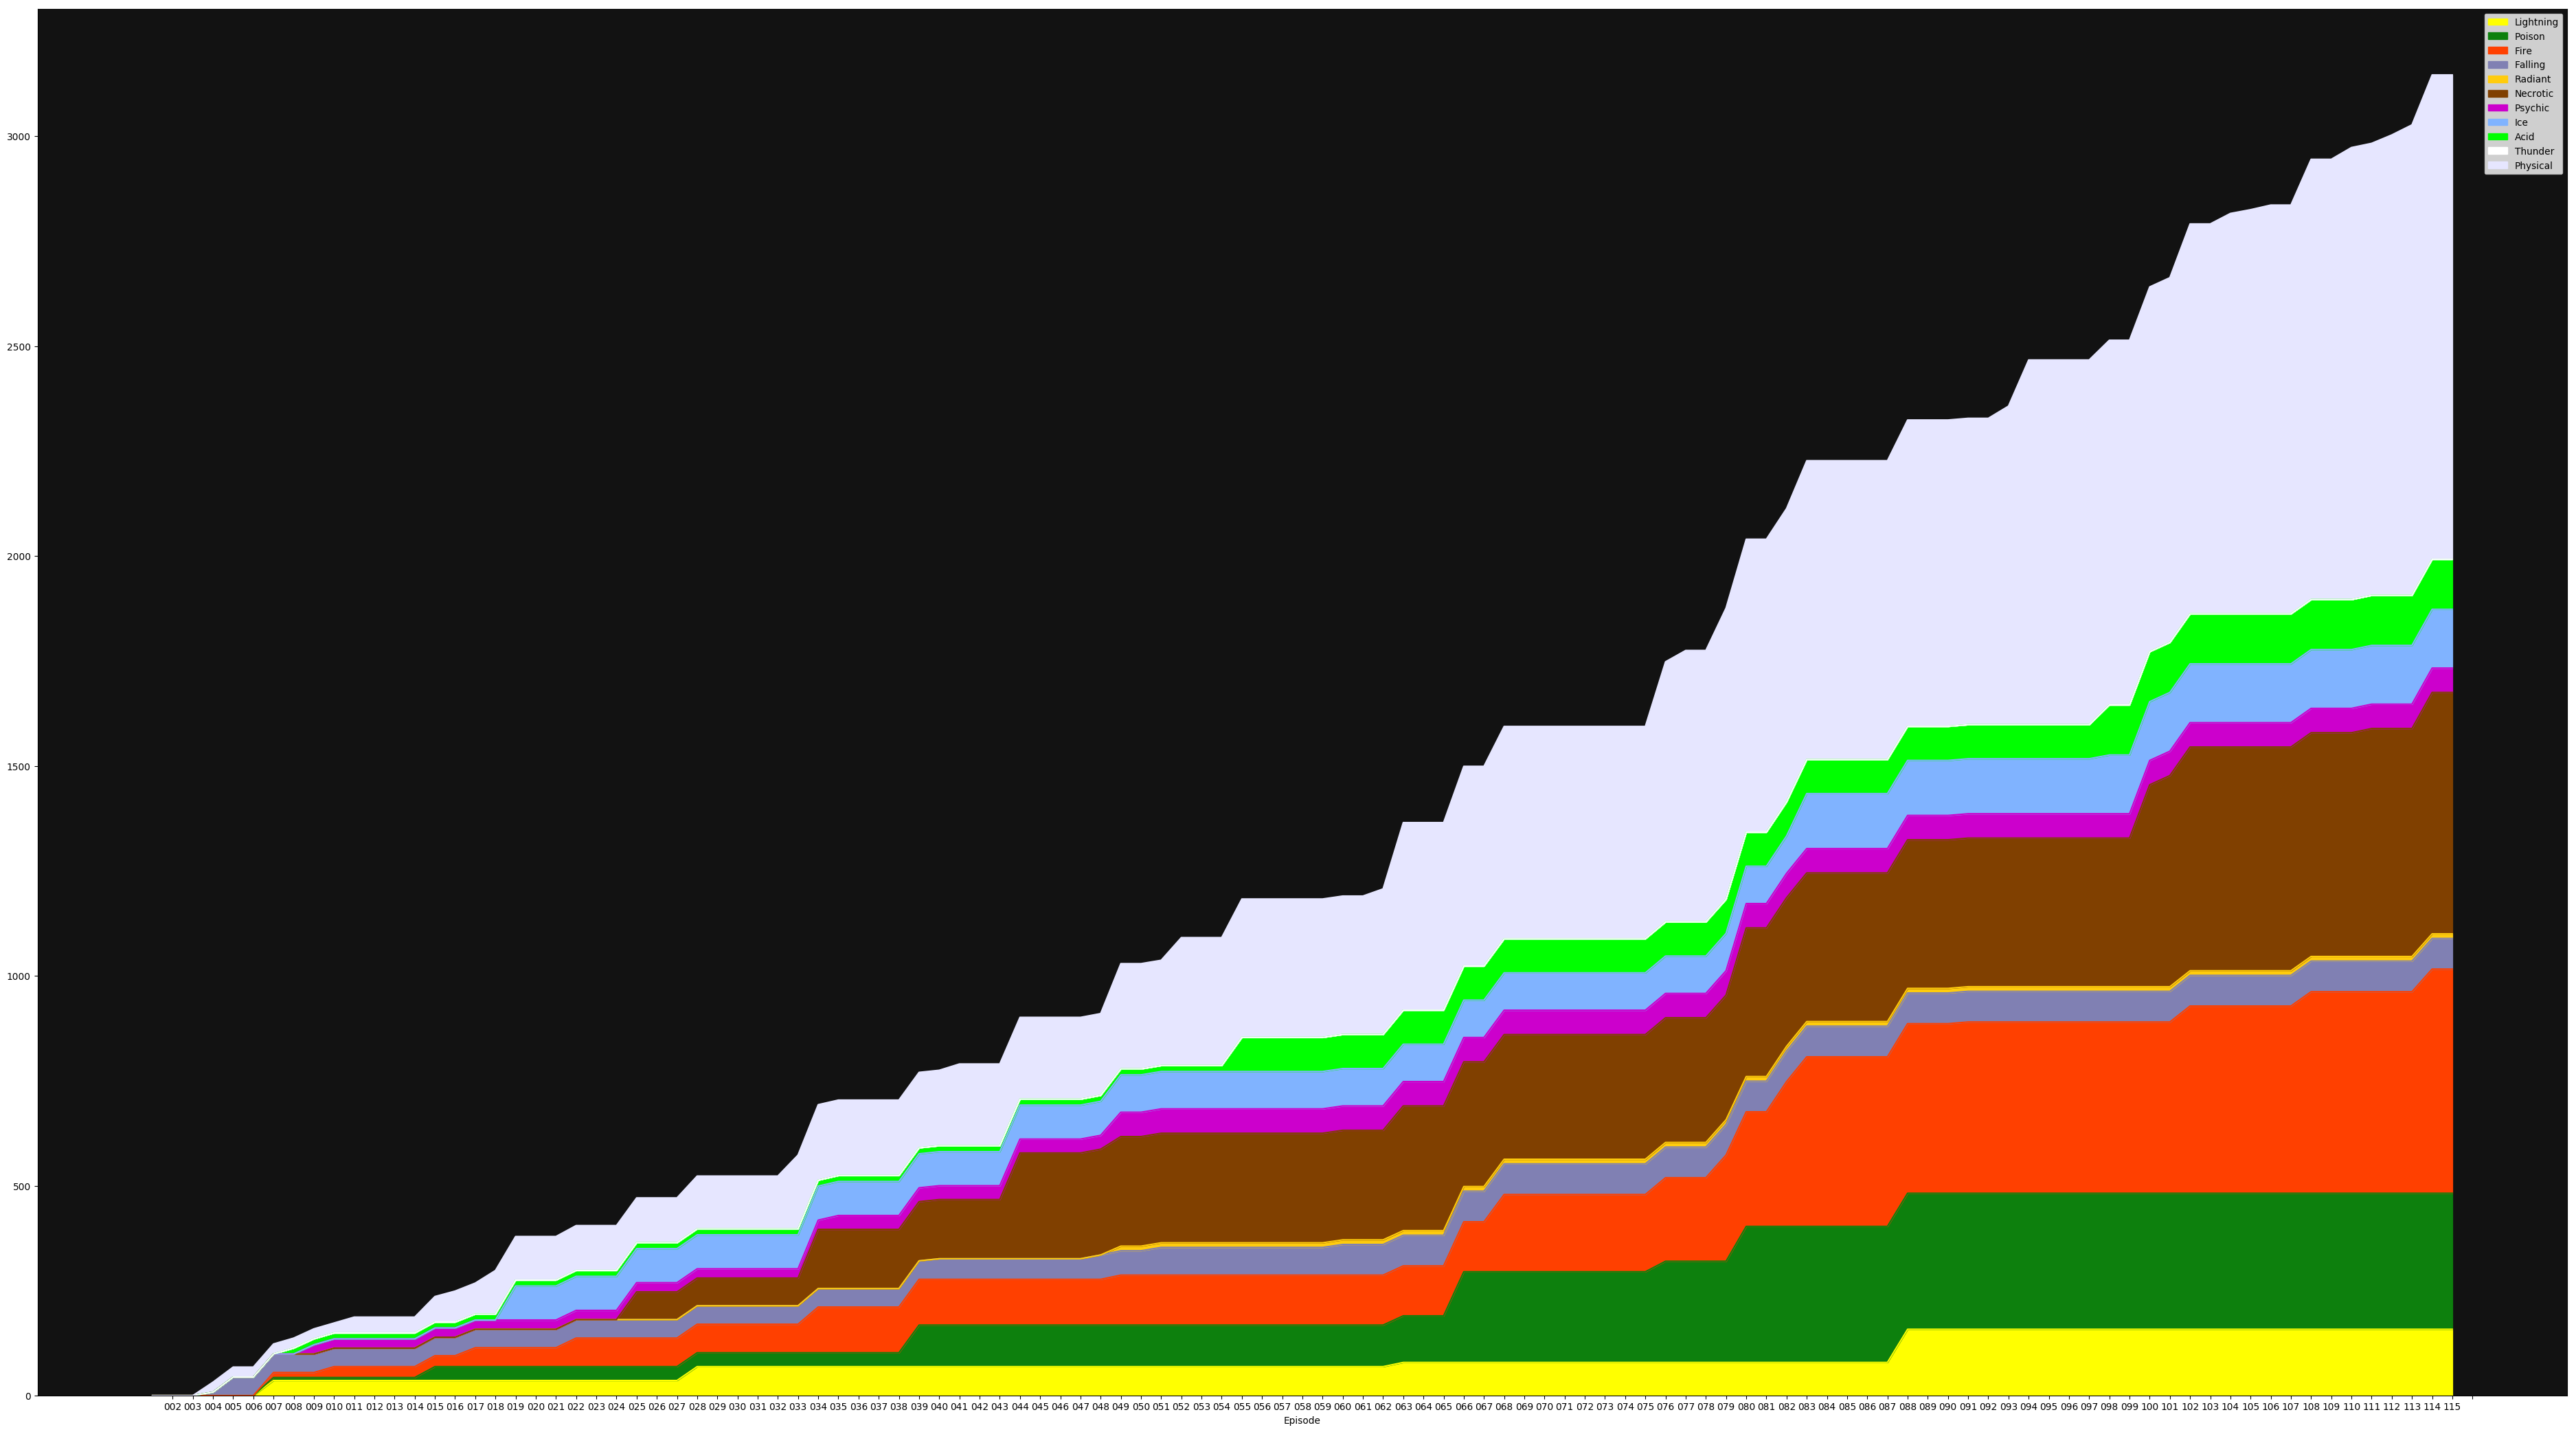

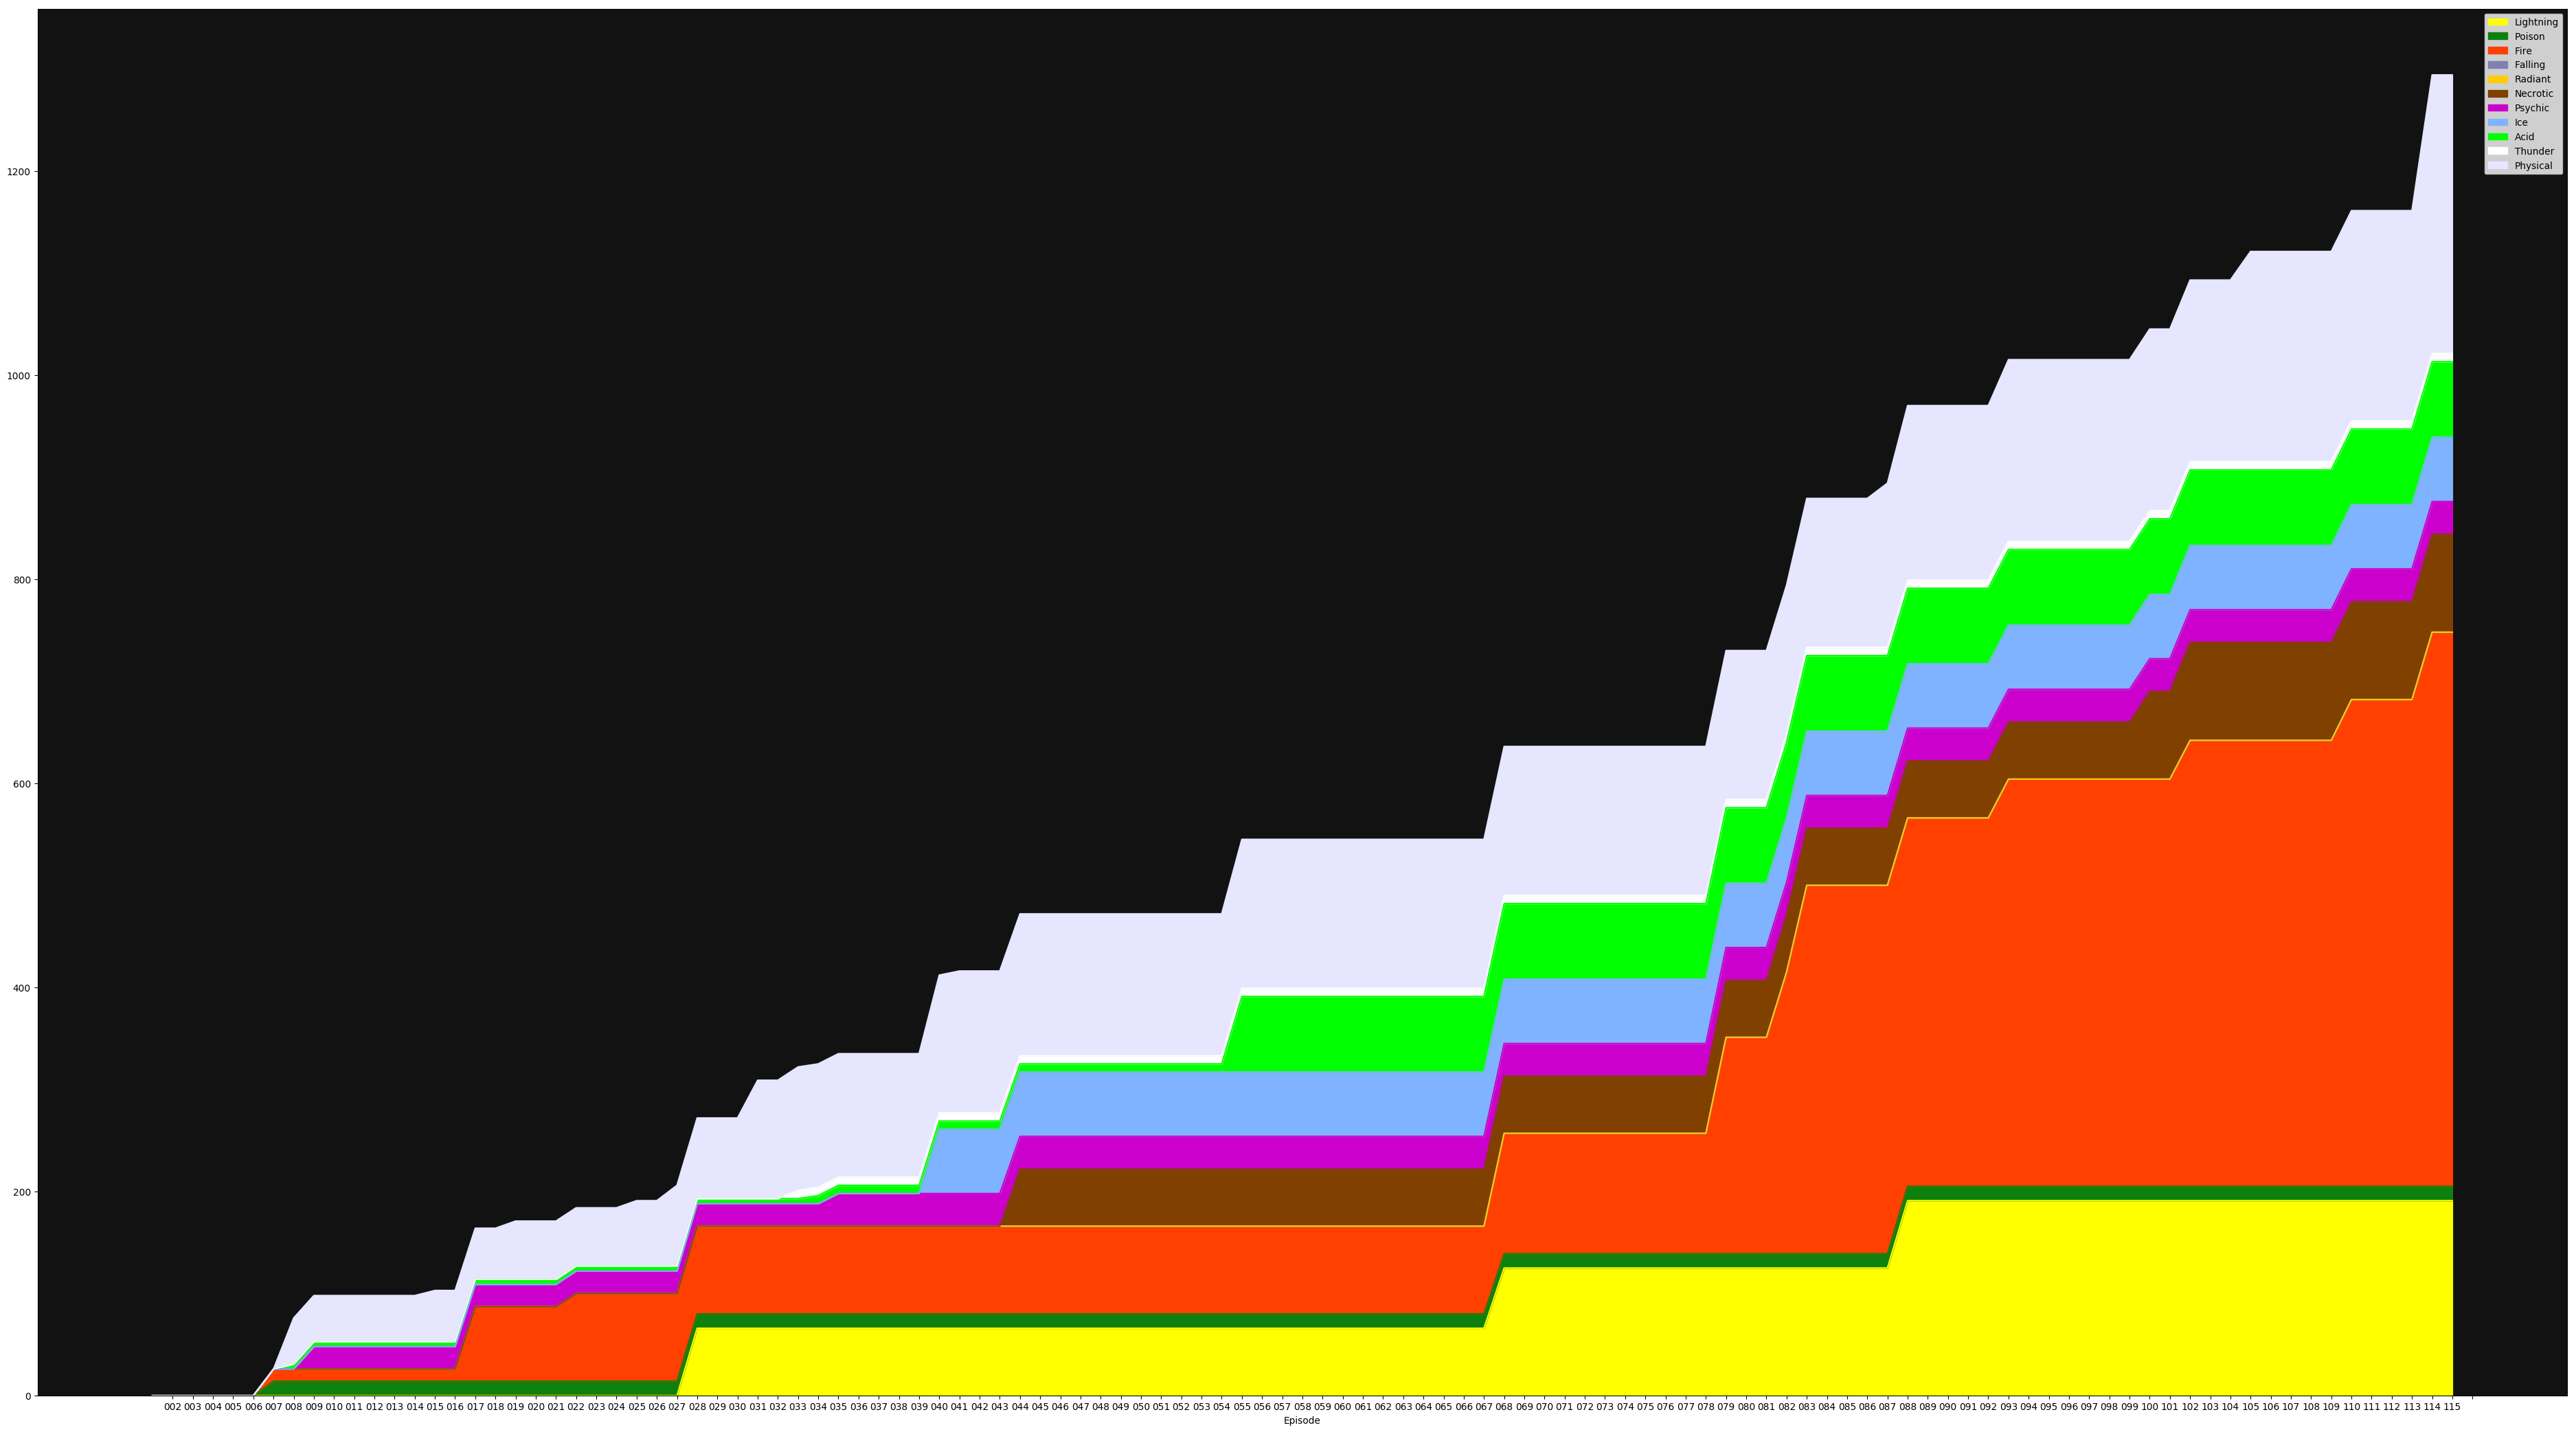

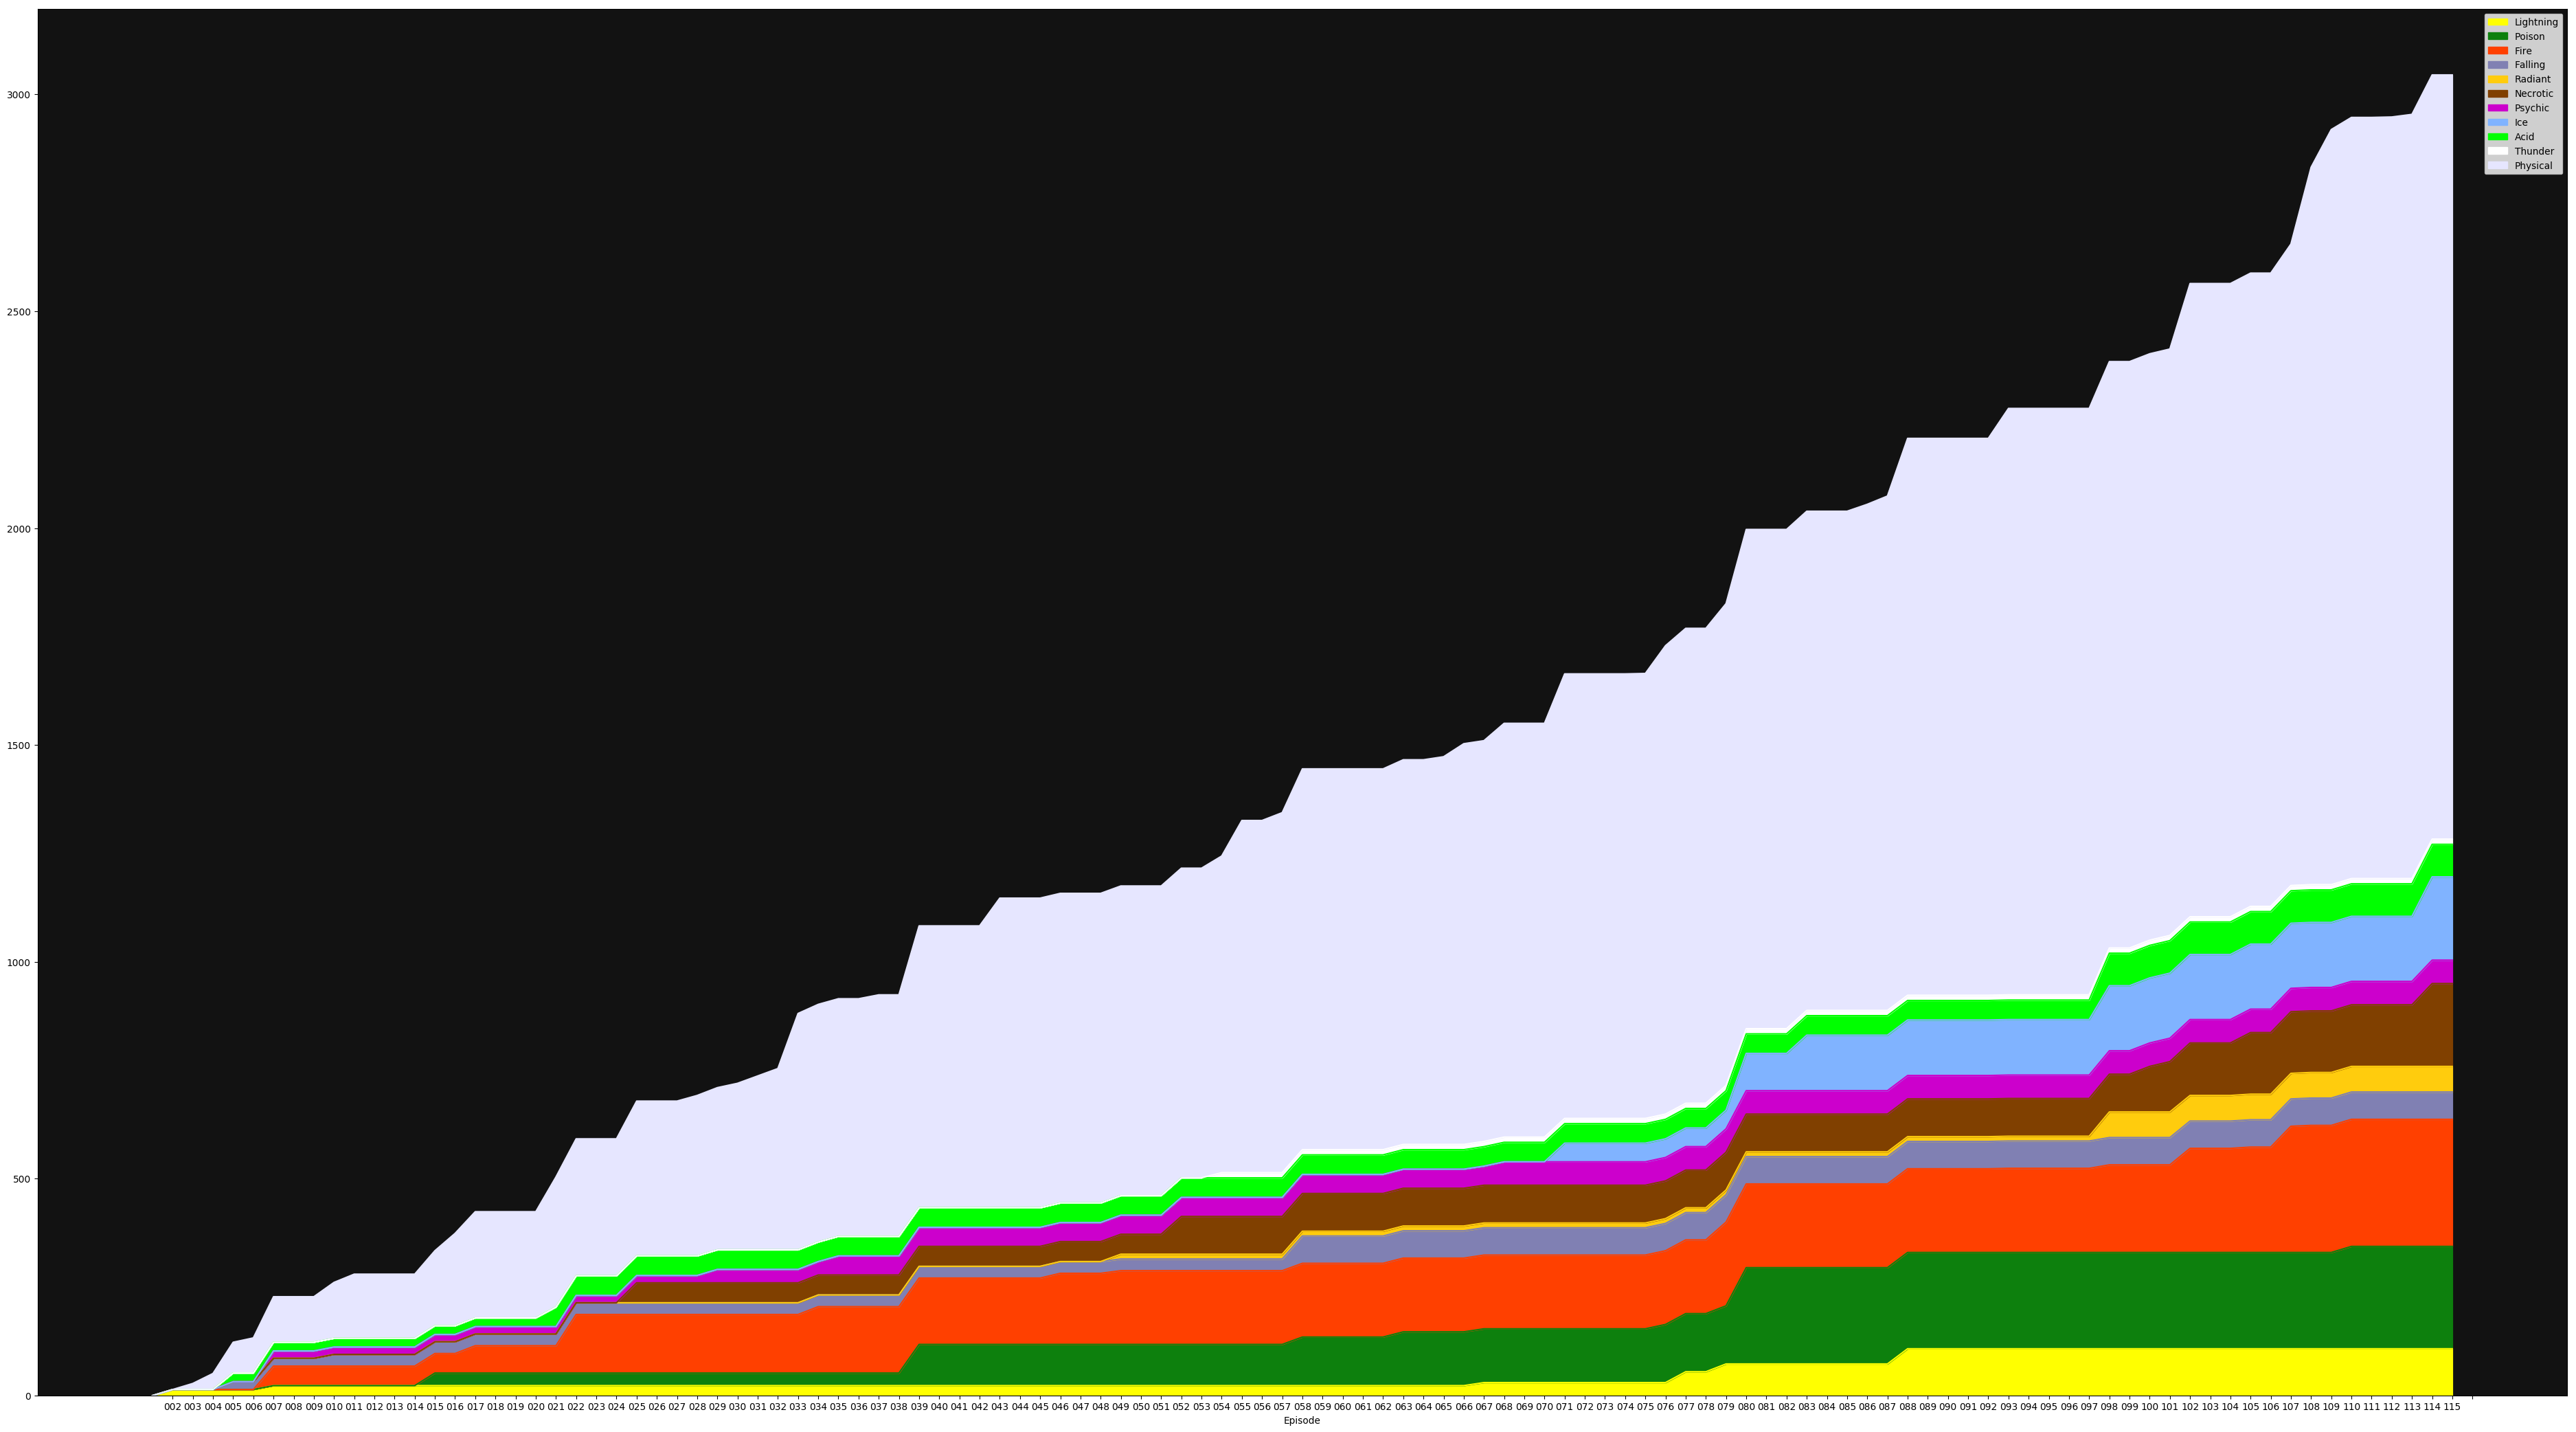

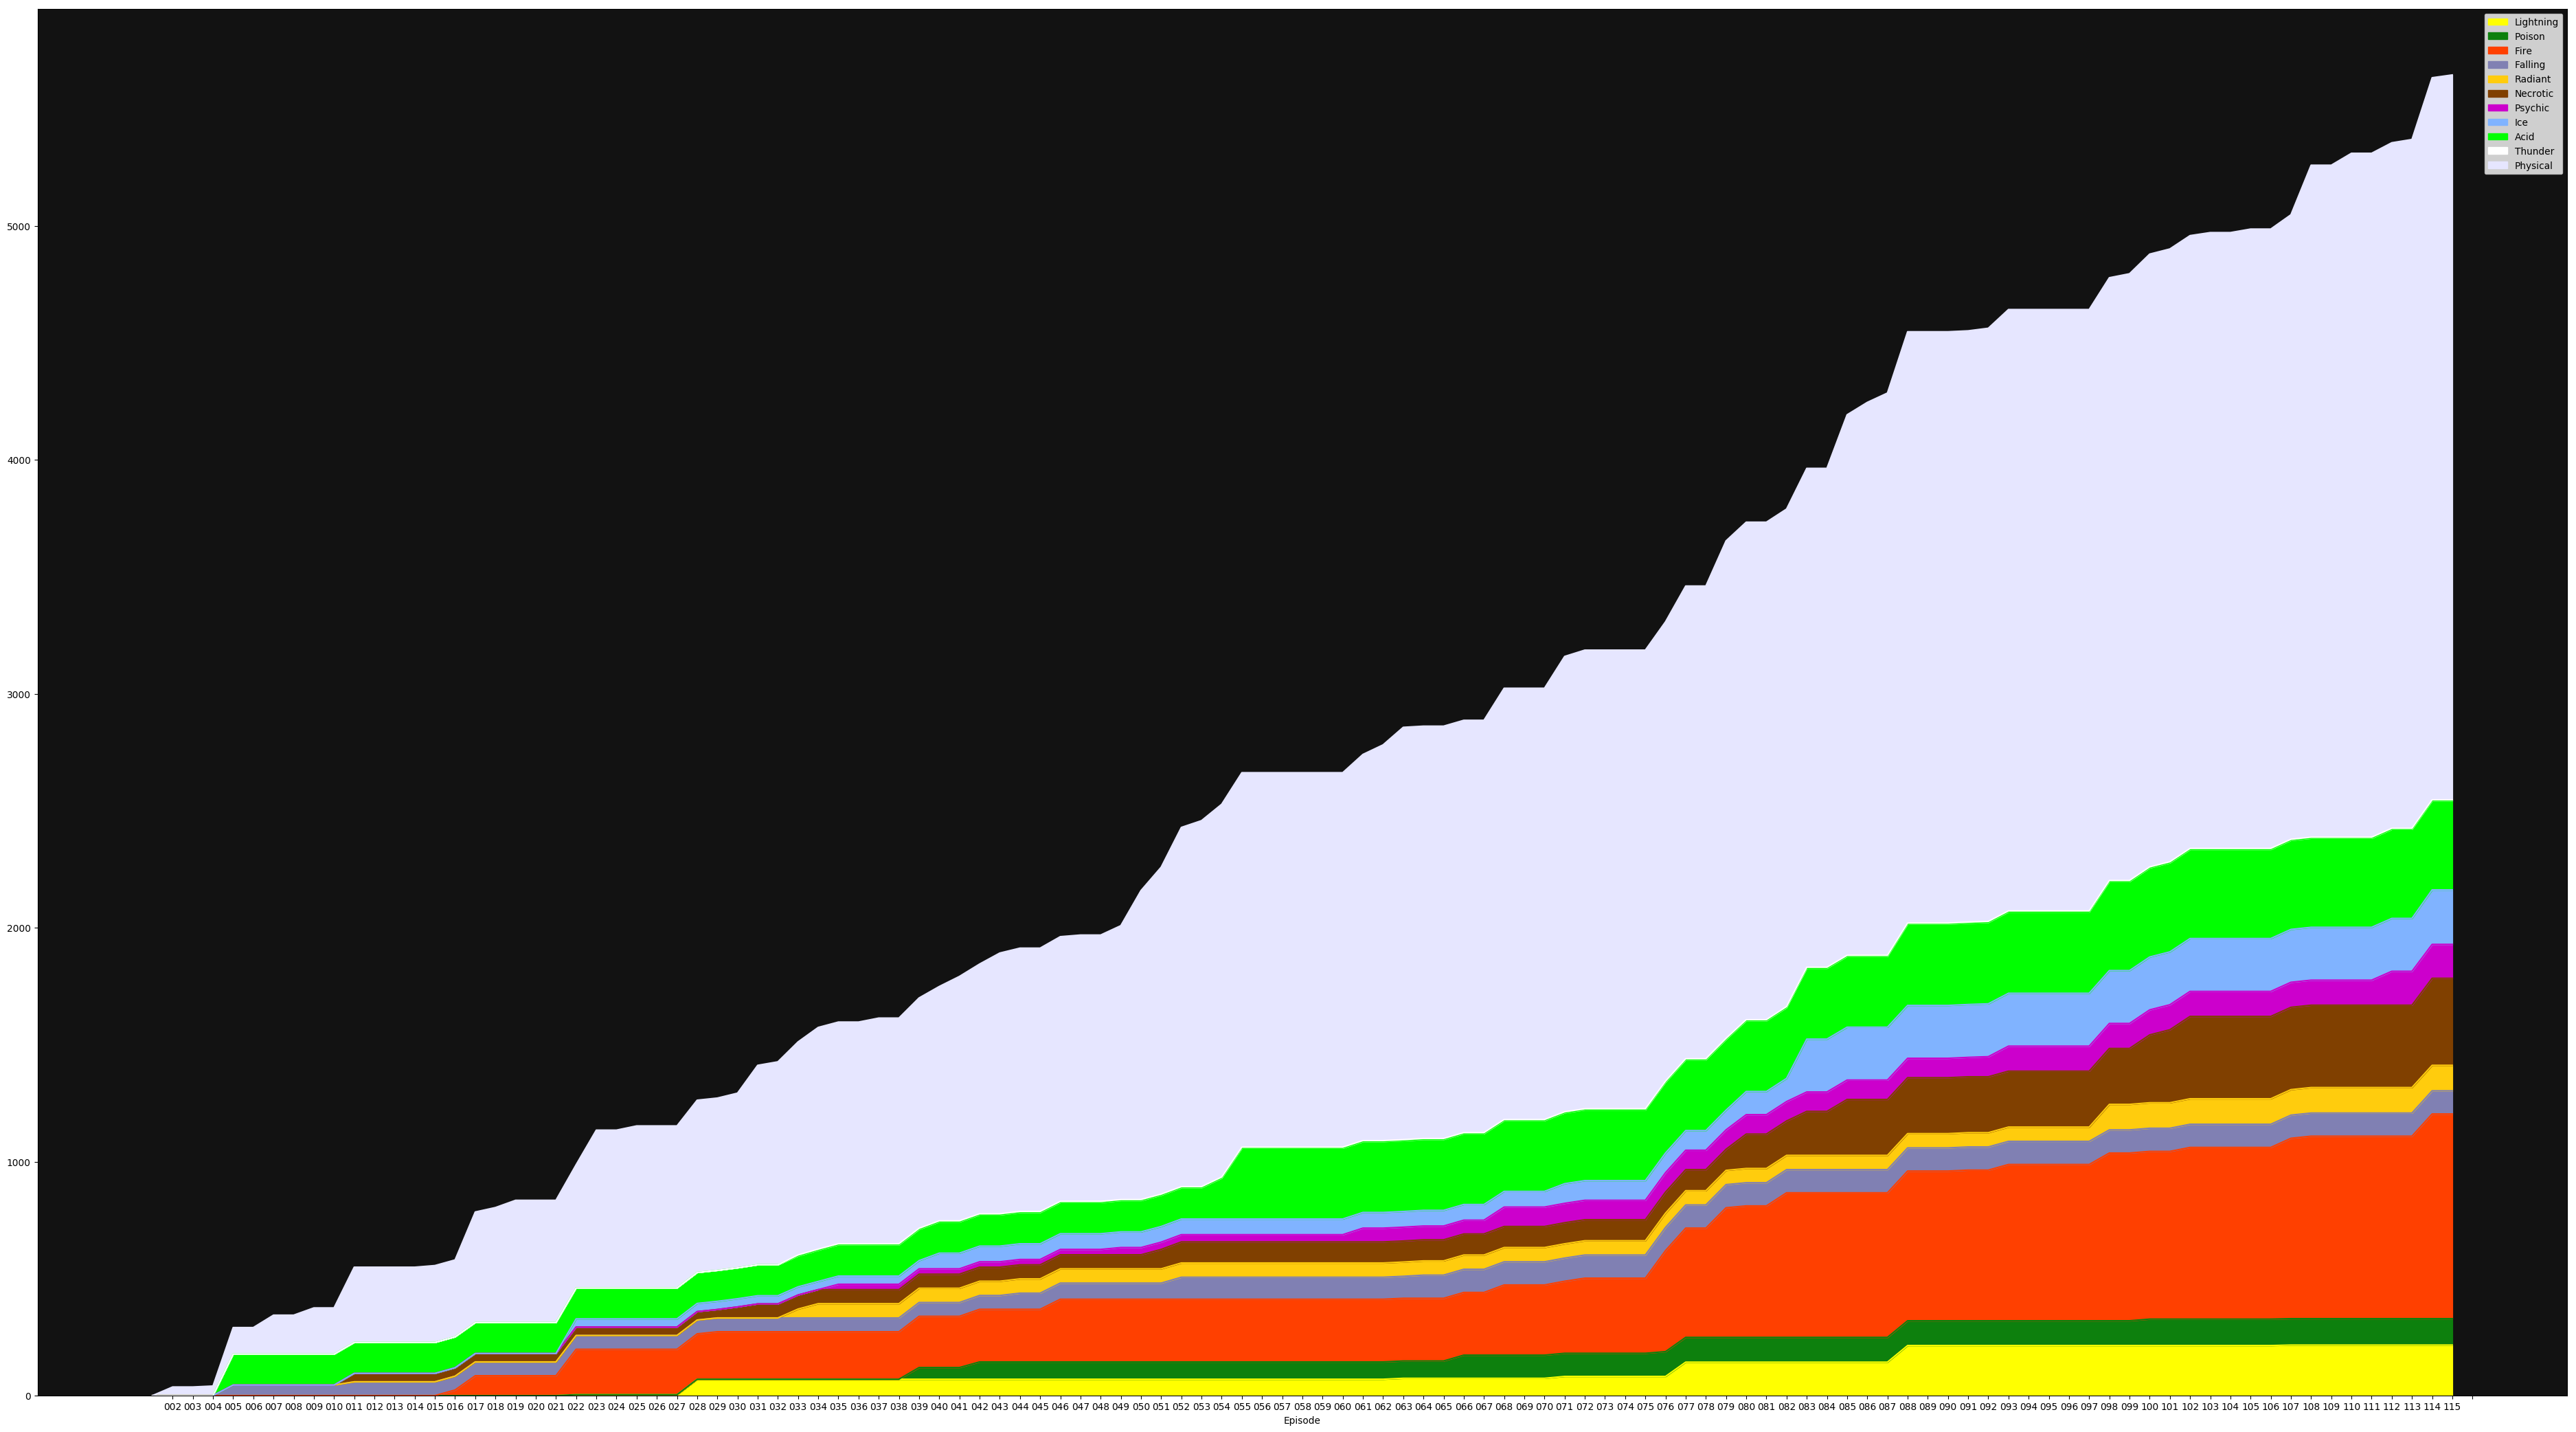

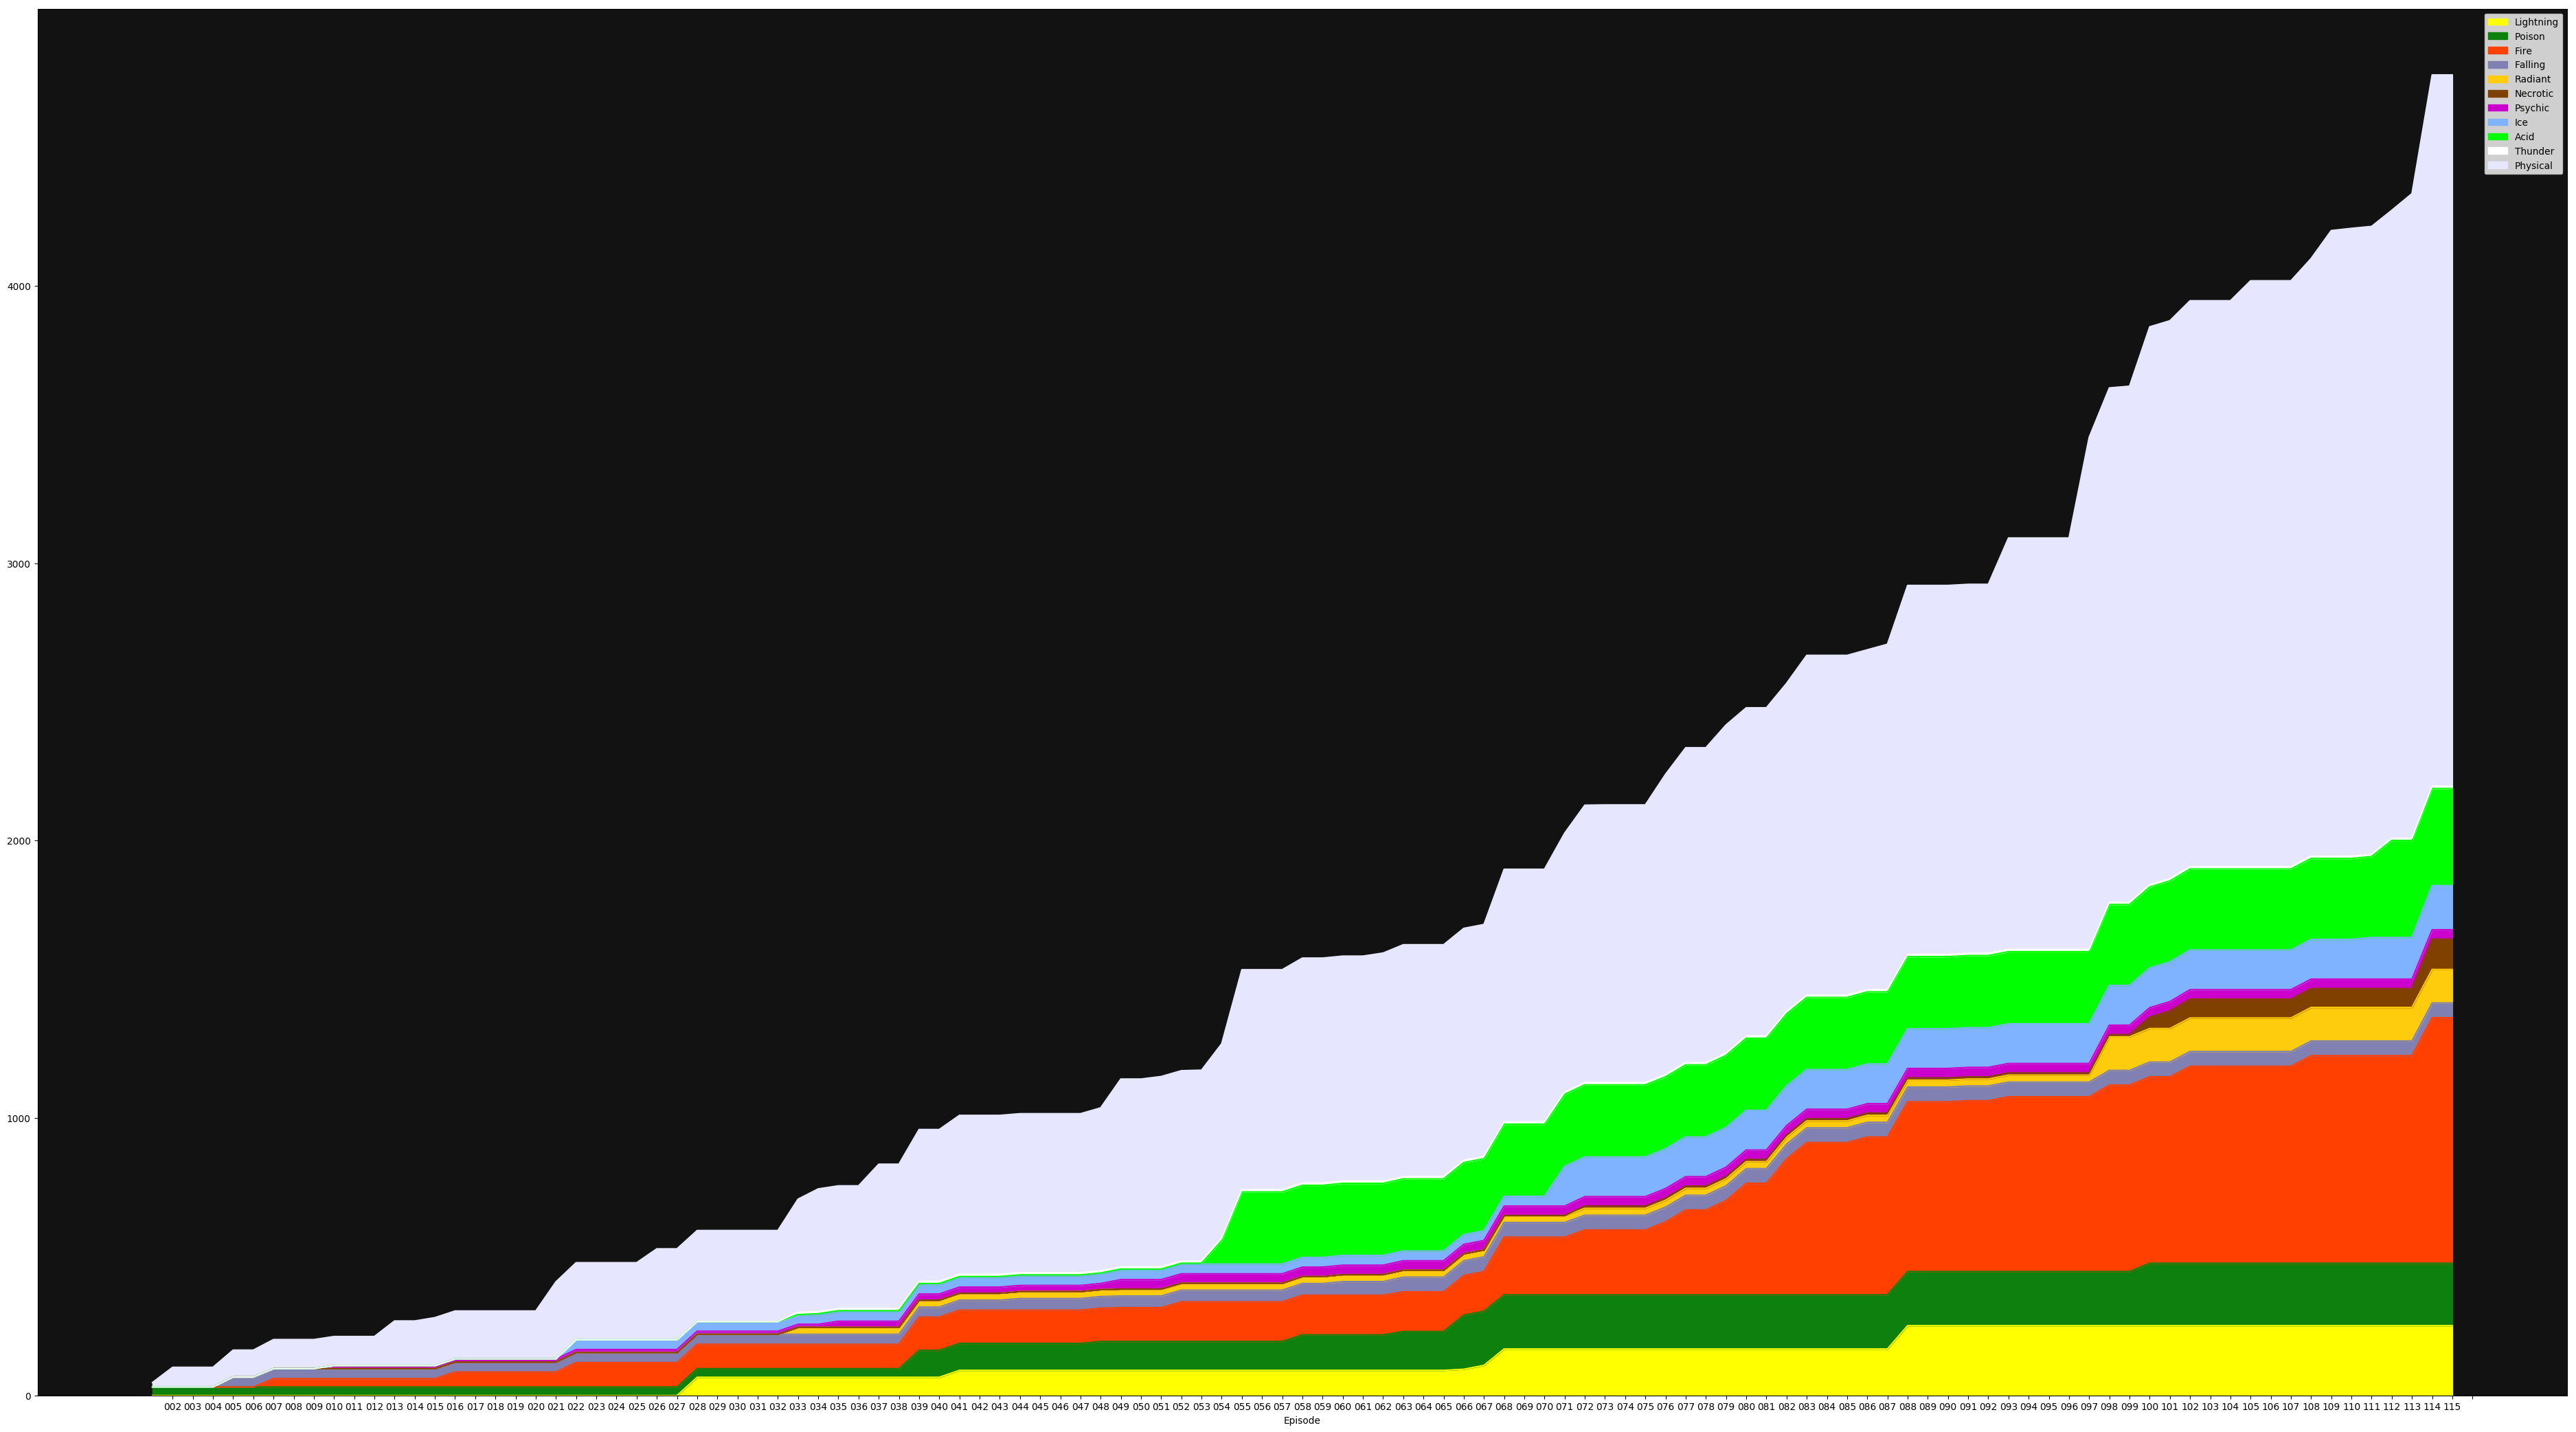

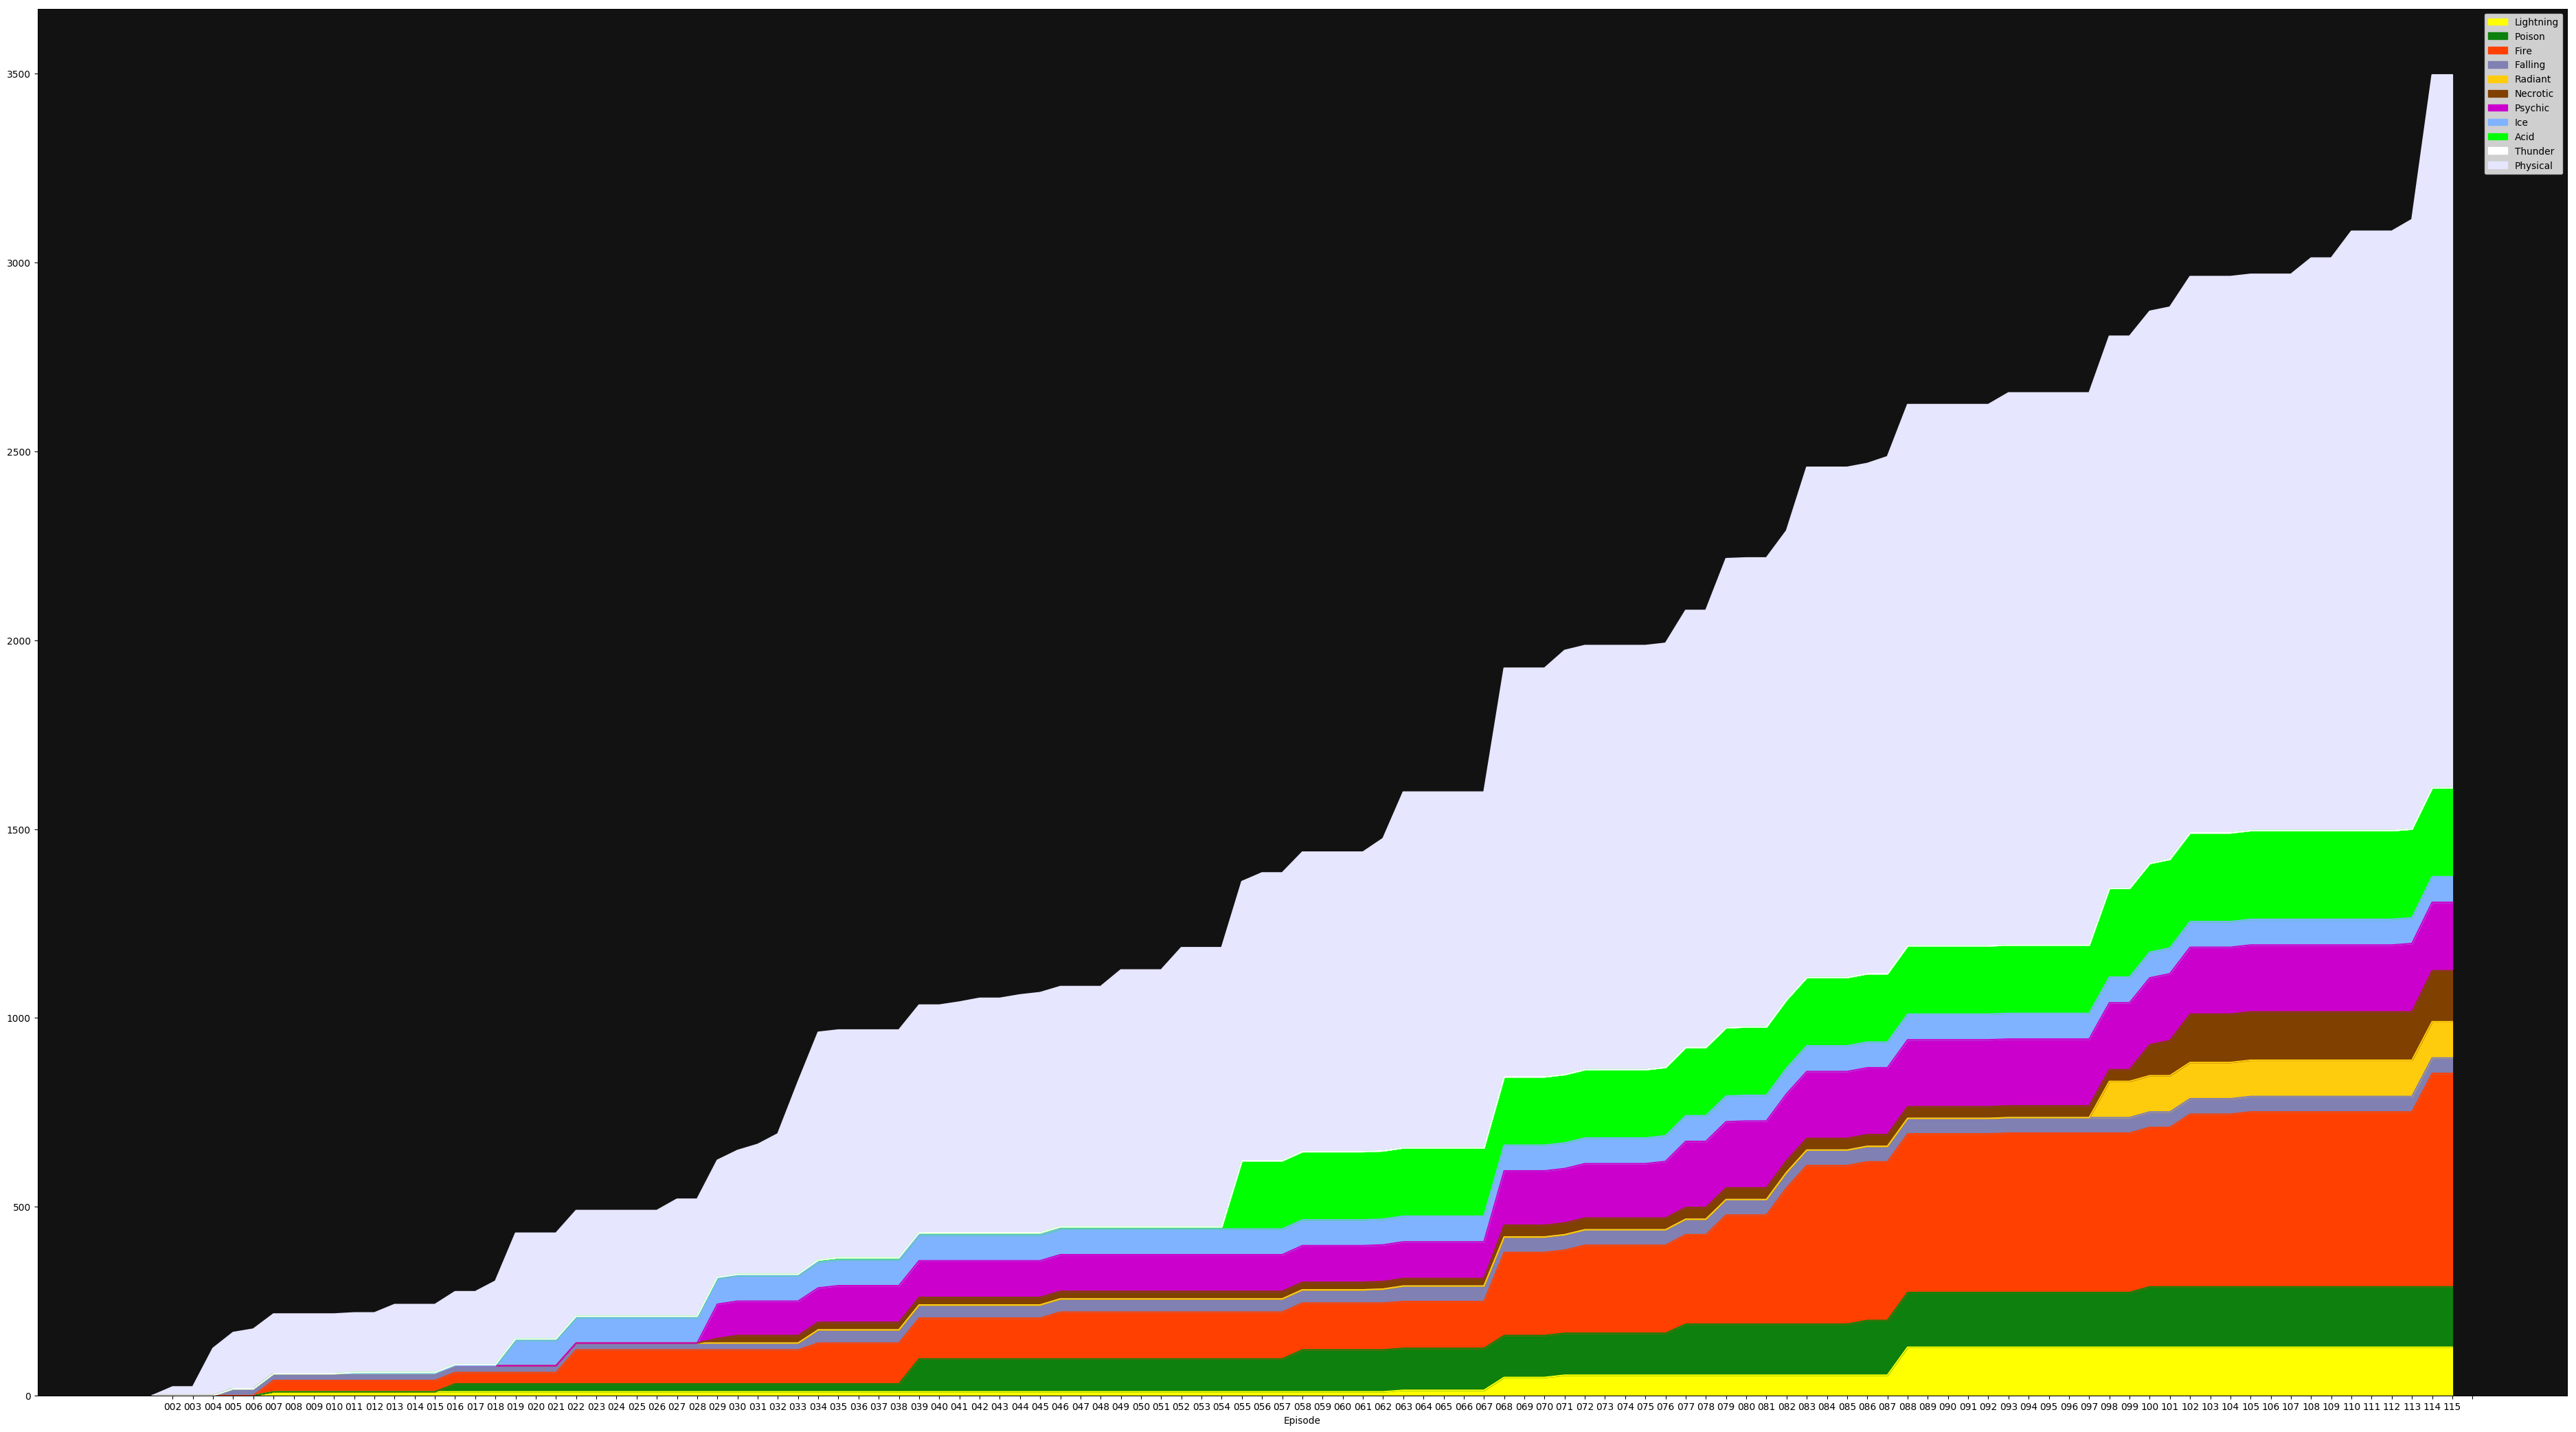

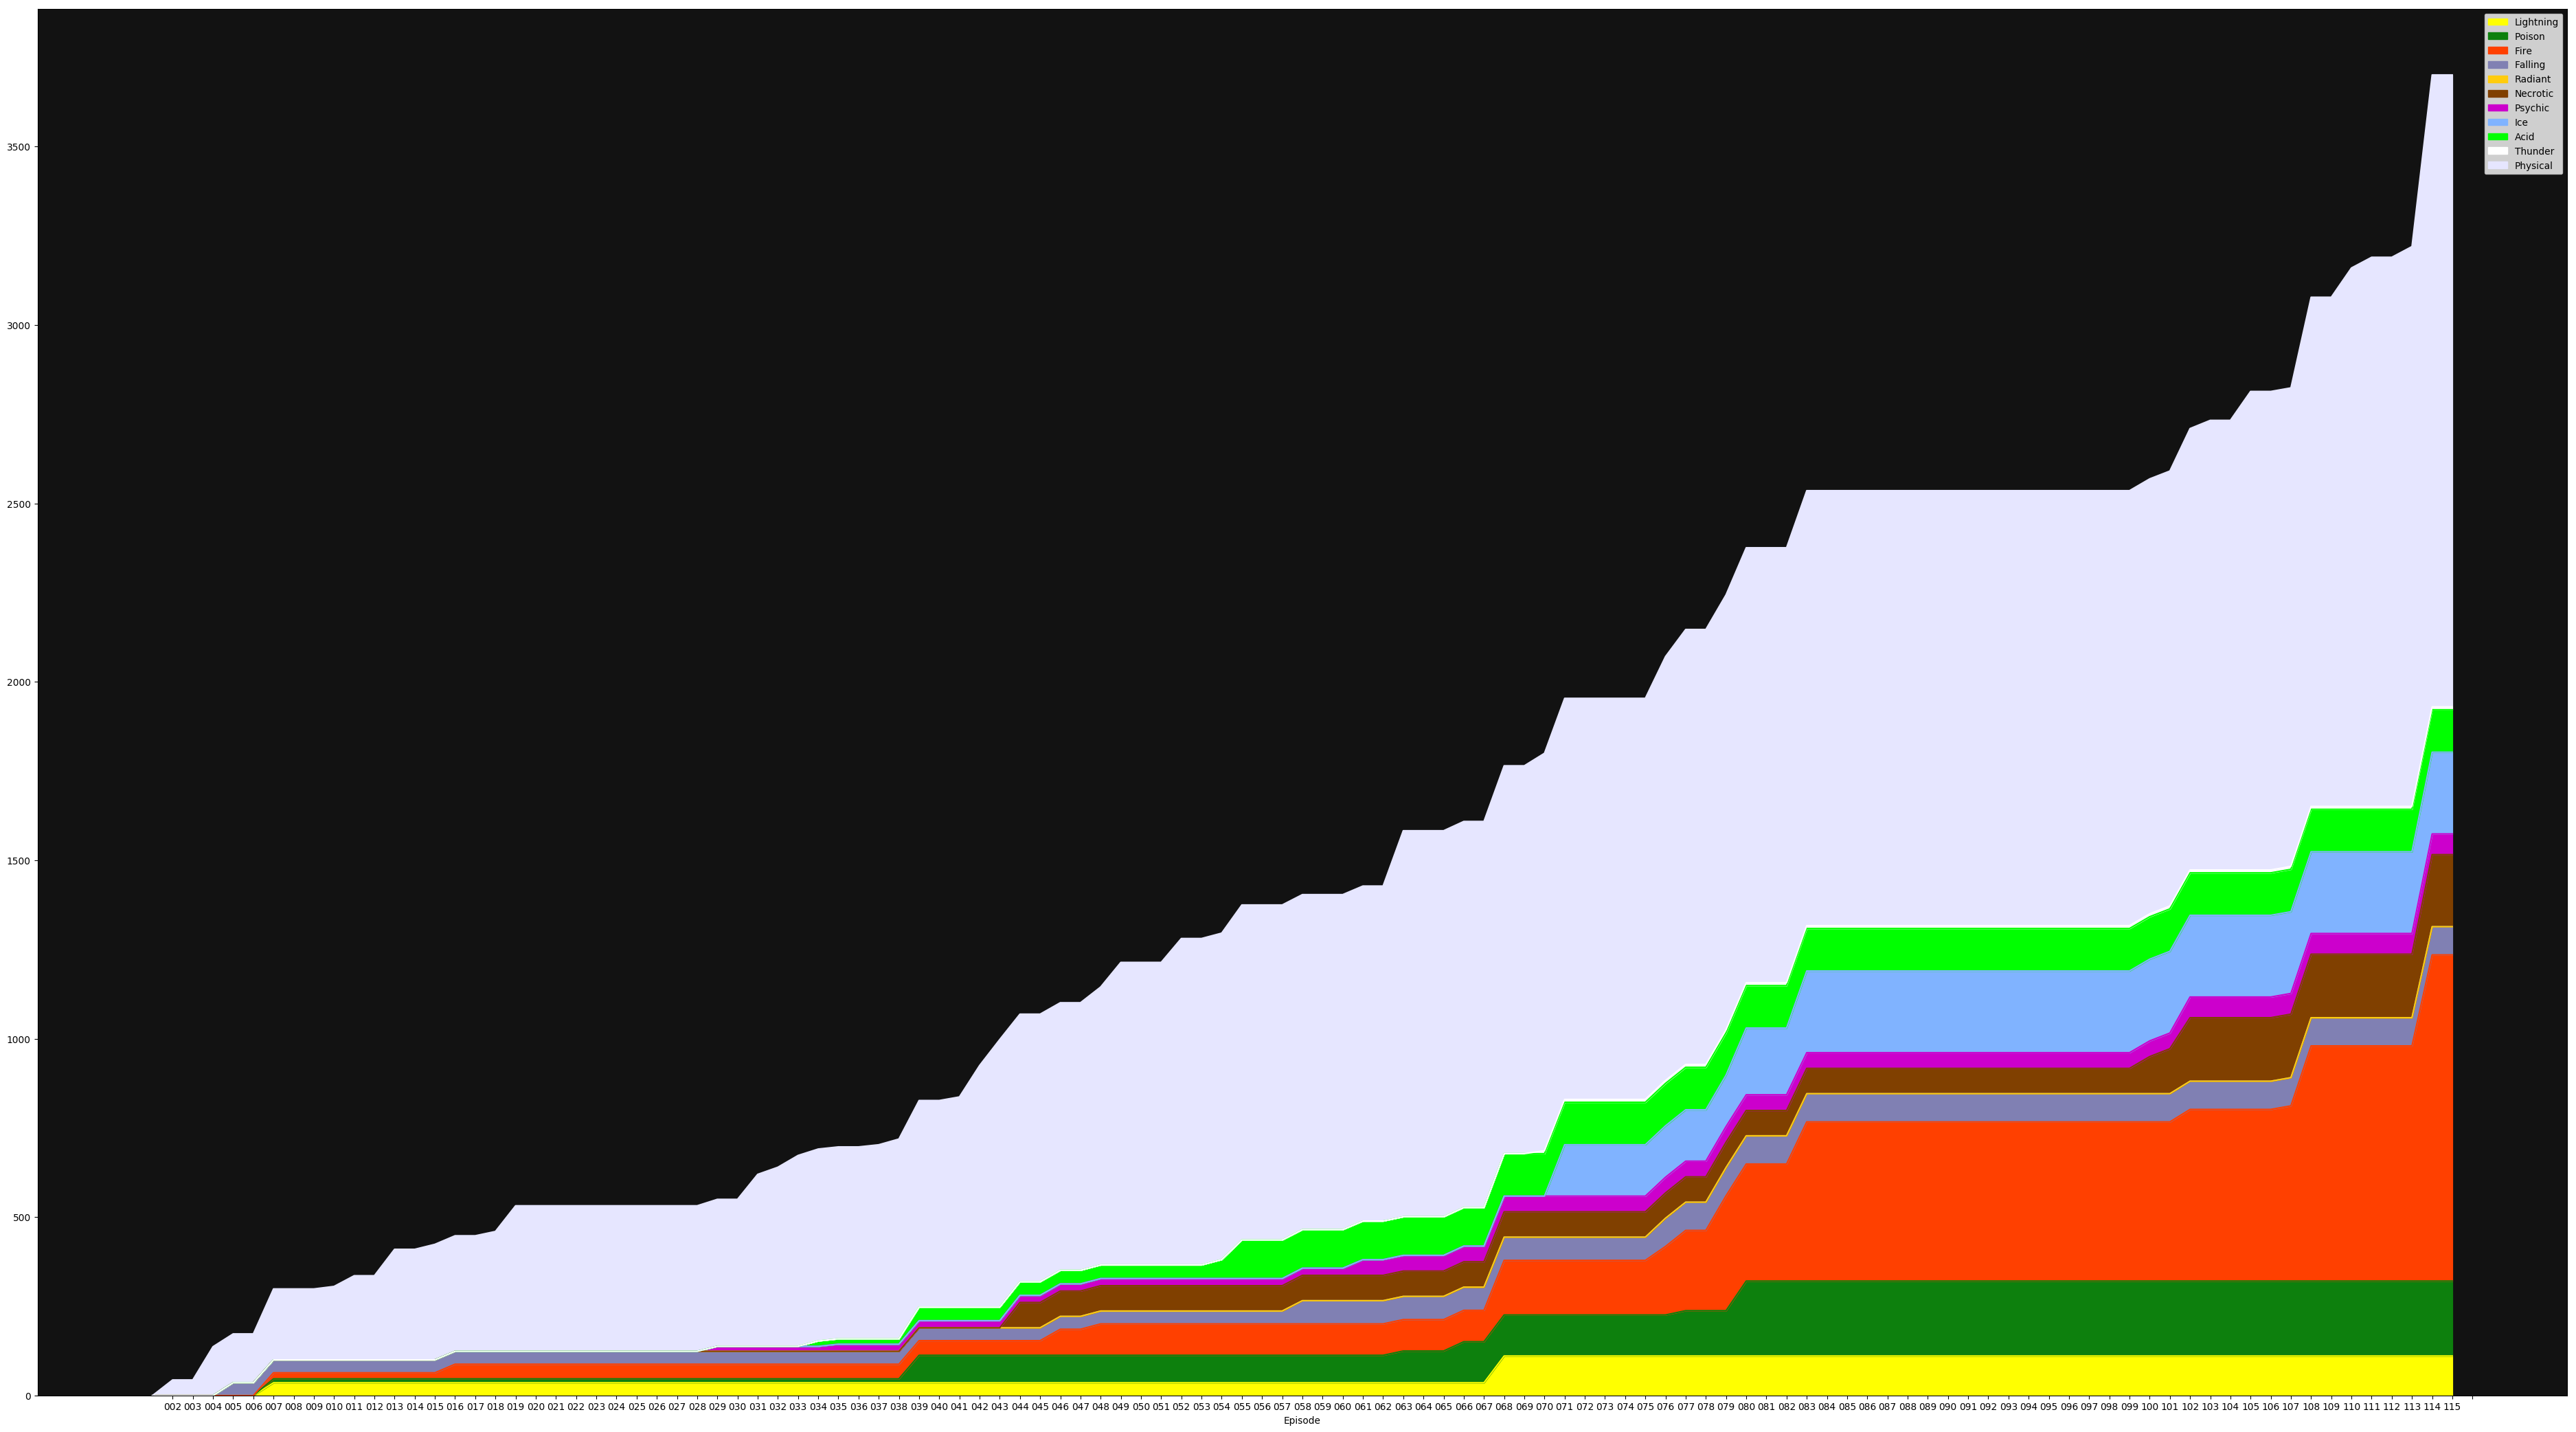

In [23]:
for i in range(0,7):
    print(chararr[i])
    ll = plt.figure(dpi=99)#;, facecolor='w', edgecolor='k')
    #plt.figure(figsize=(20,10))
    indexvalues = [int(x) for x in accmData[i].index.values]
    #gplt = accmData[0].plot.area(stacked=True, figsize=(48,27), colormap="tab20c")
    gplt = accmData[i].cumsum().plot.area(ax = plt.gca(), stacked=True, figsize=(48,27), colormap=CustomCmap, xticks=indexvalues)
    gplt.set_facecolor('#121212')
    gplt.plot()
    plt.savefig("out/" + chararr[i] + ".area.png")



Vex
Trinket
Vax
Grog
Keyleth
Percy
Scanlan


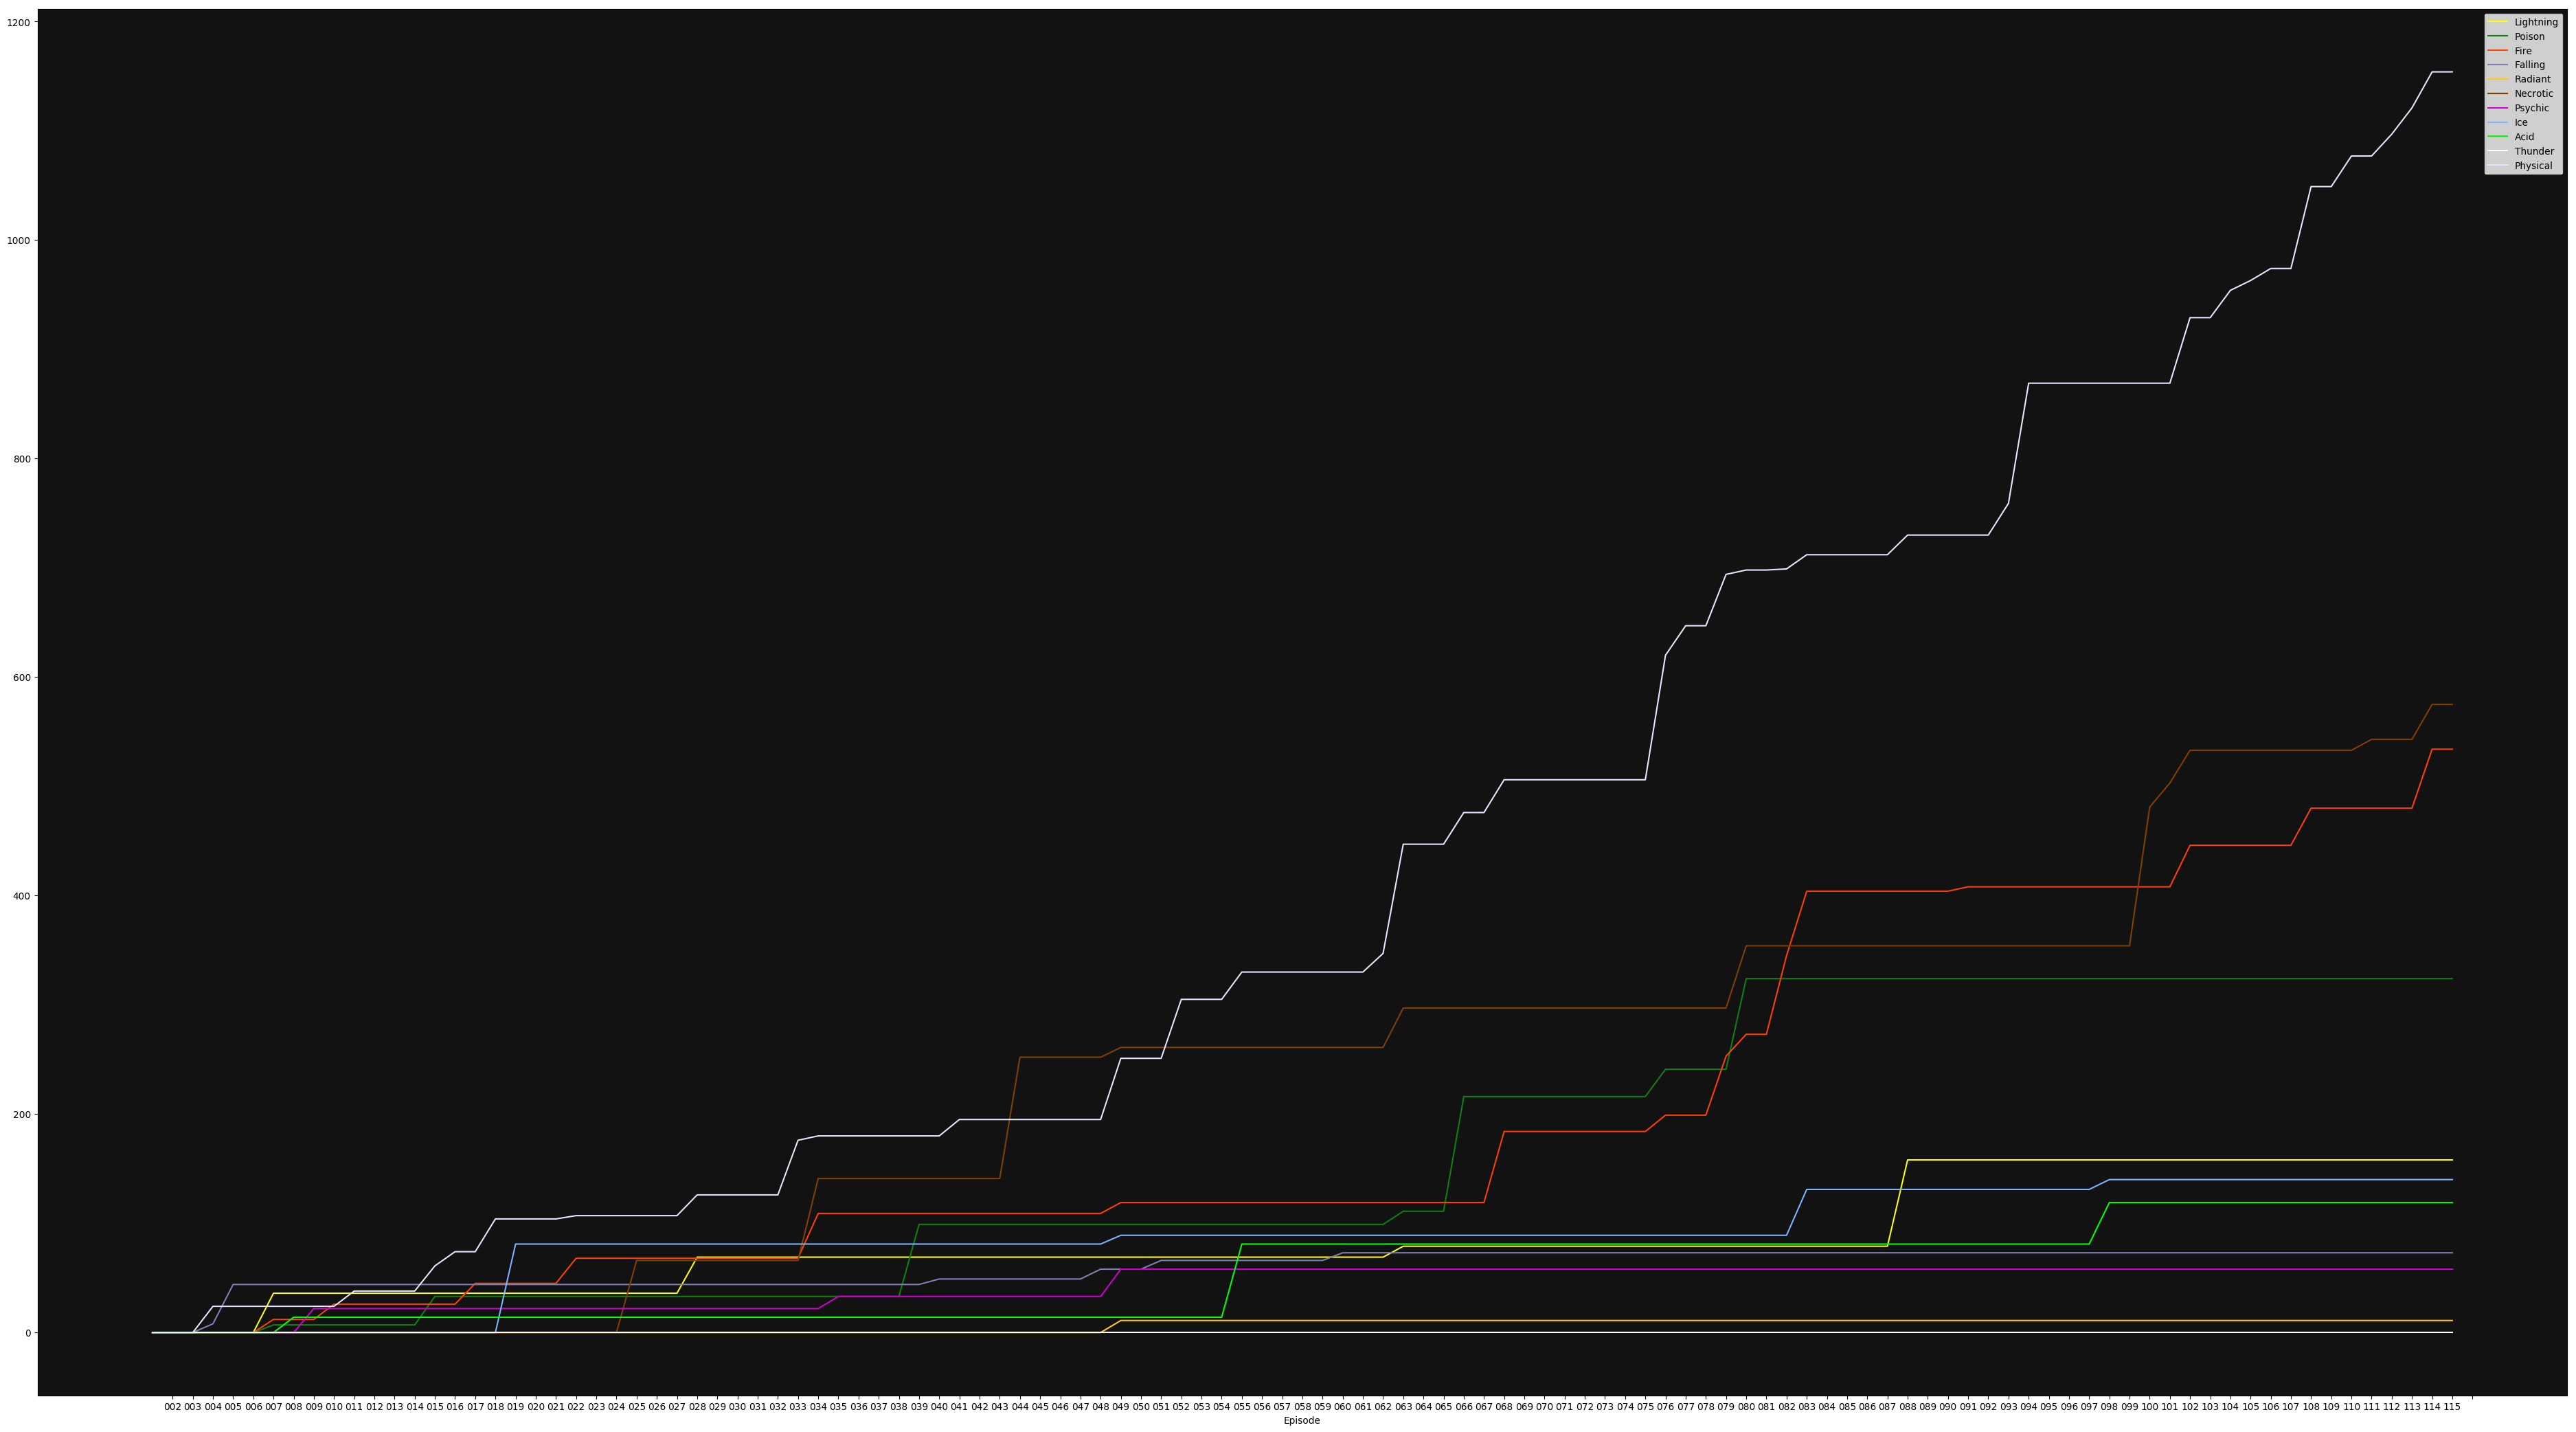

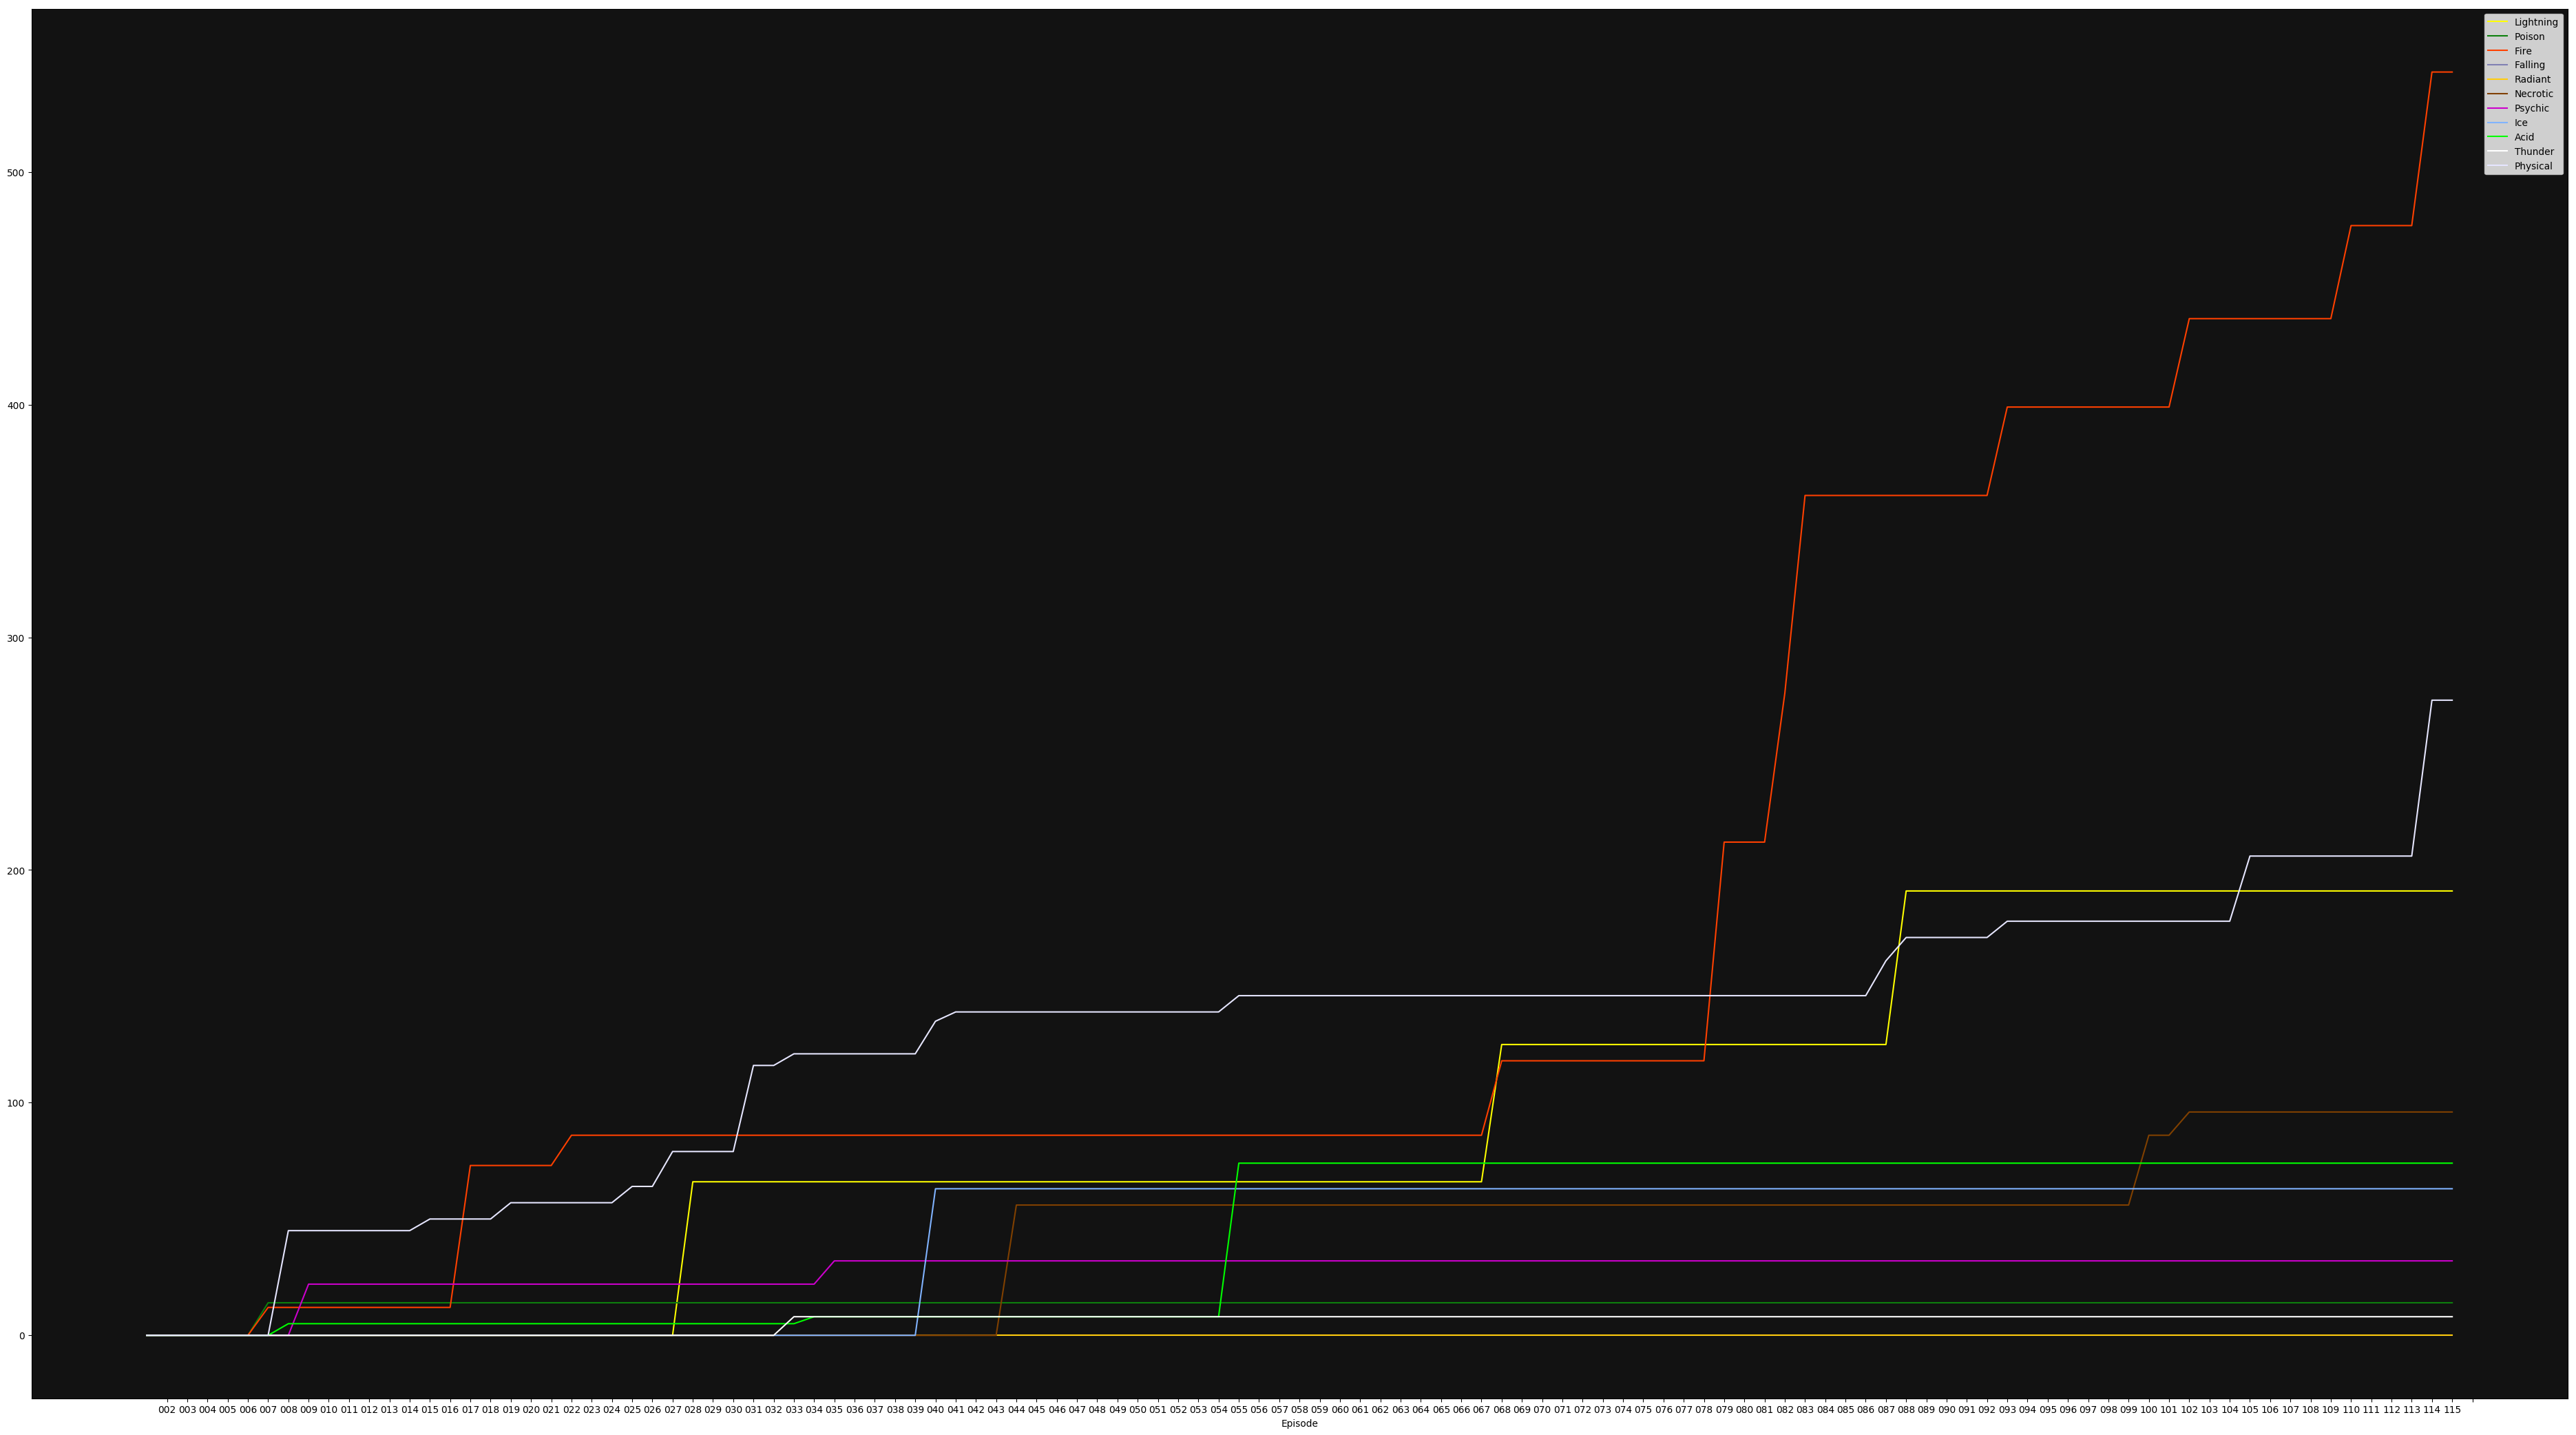

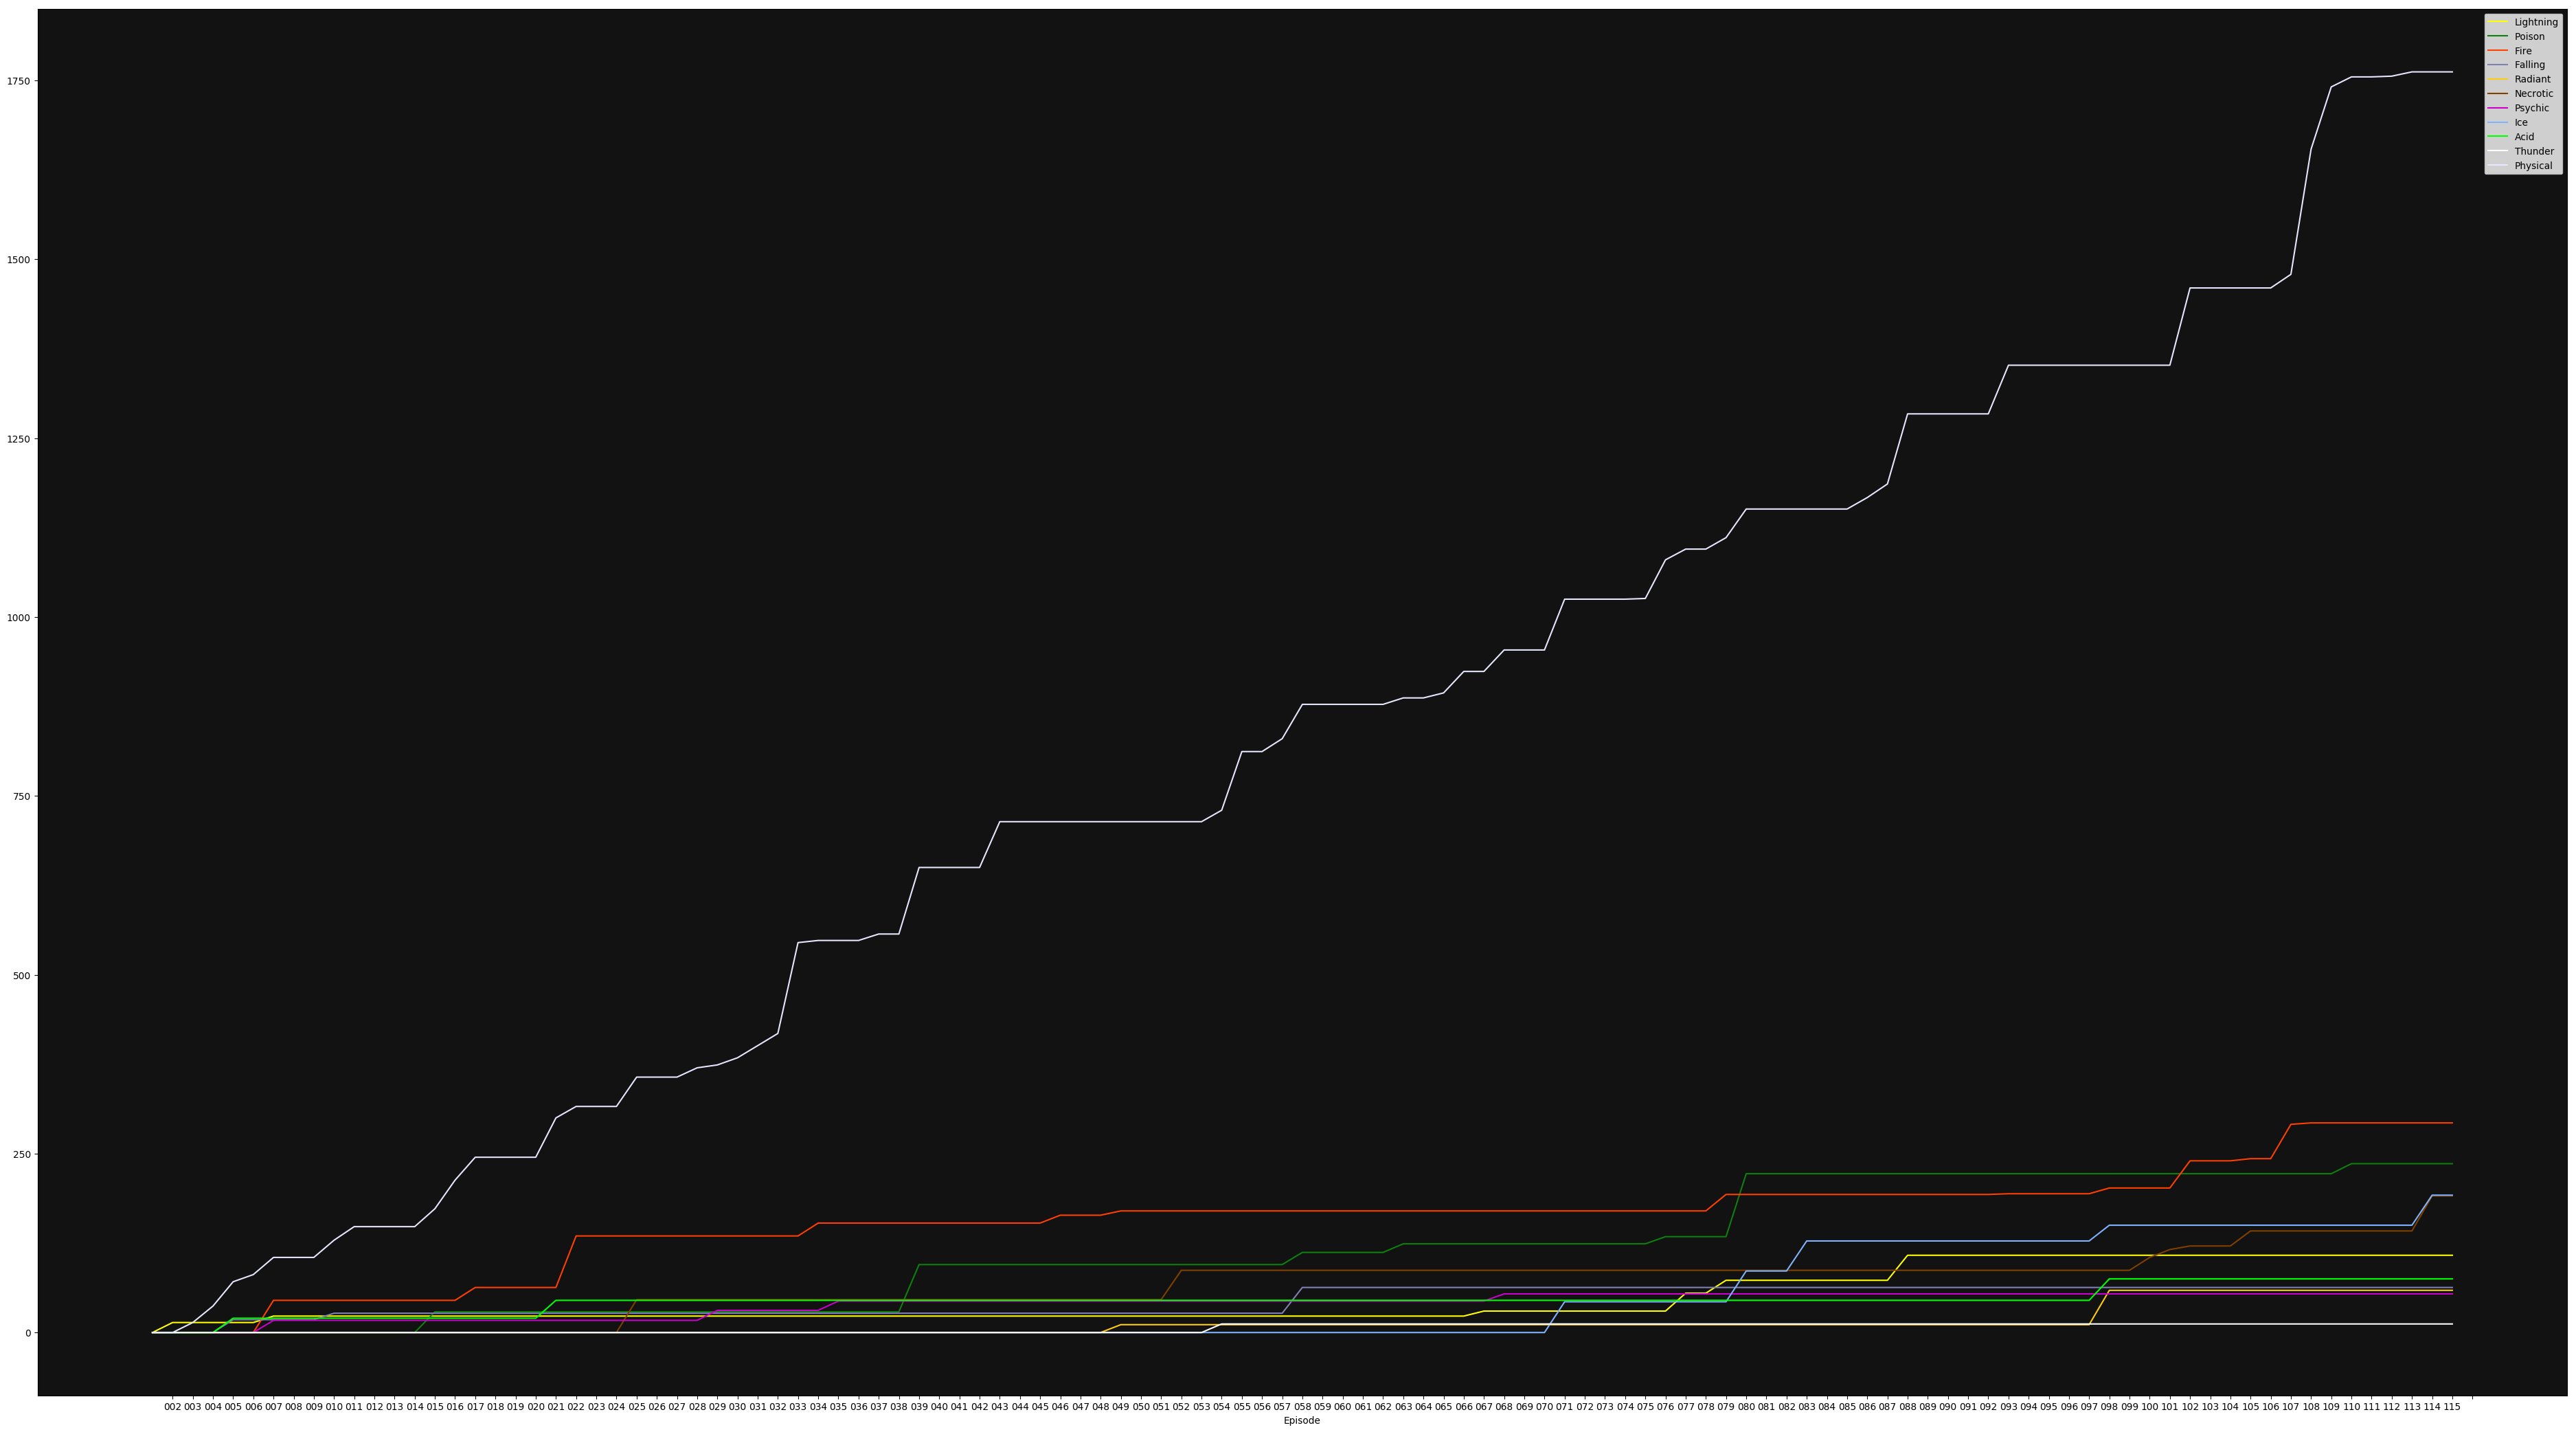

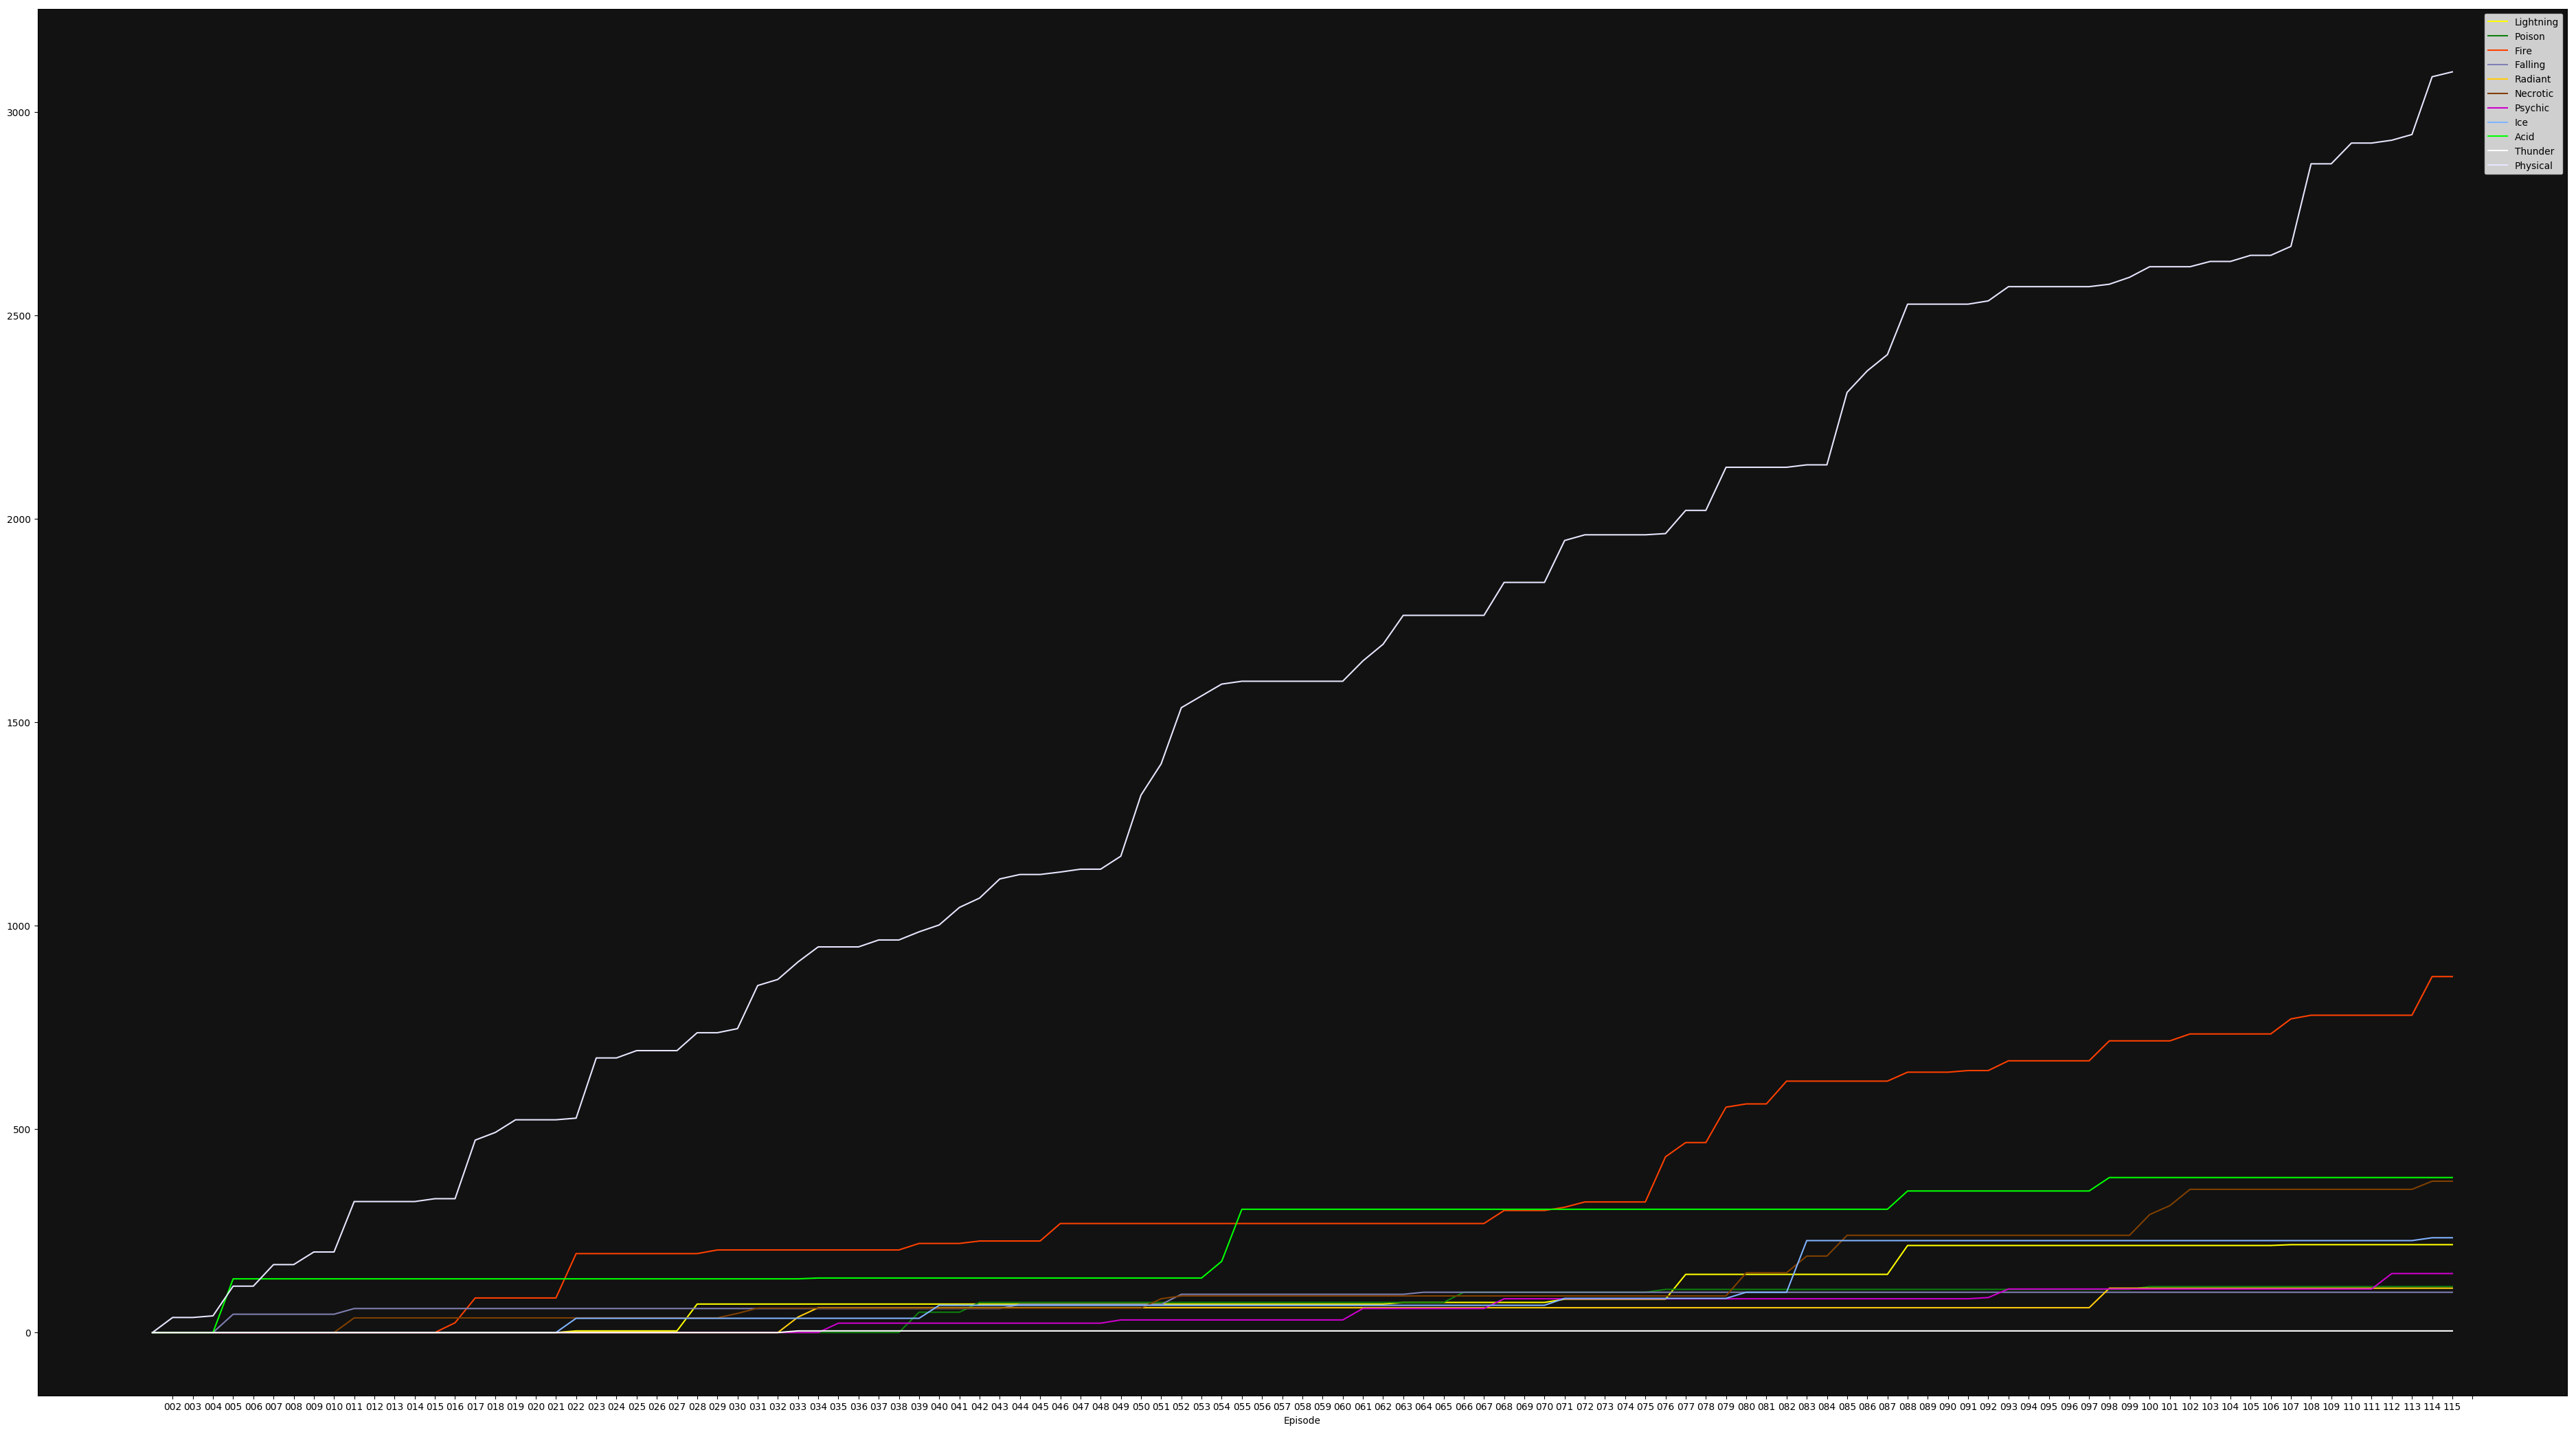

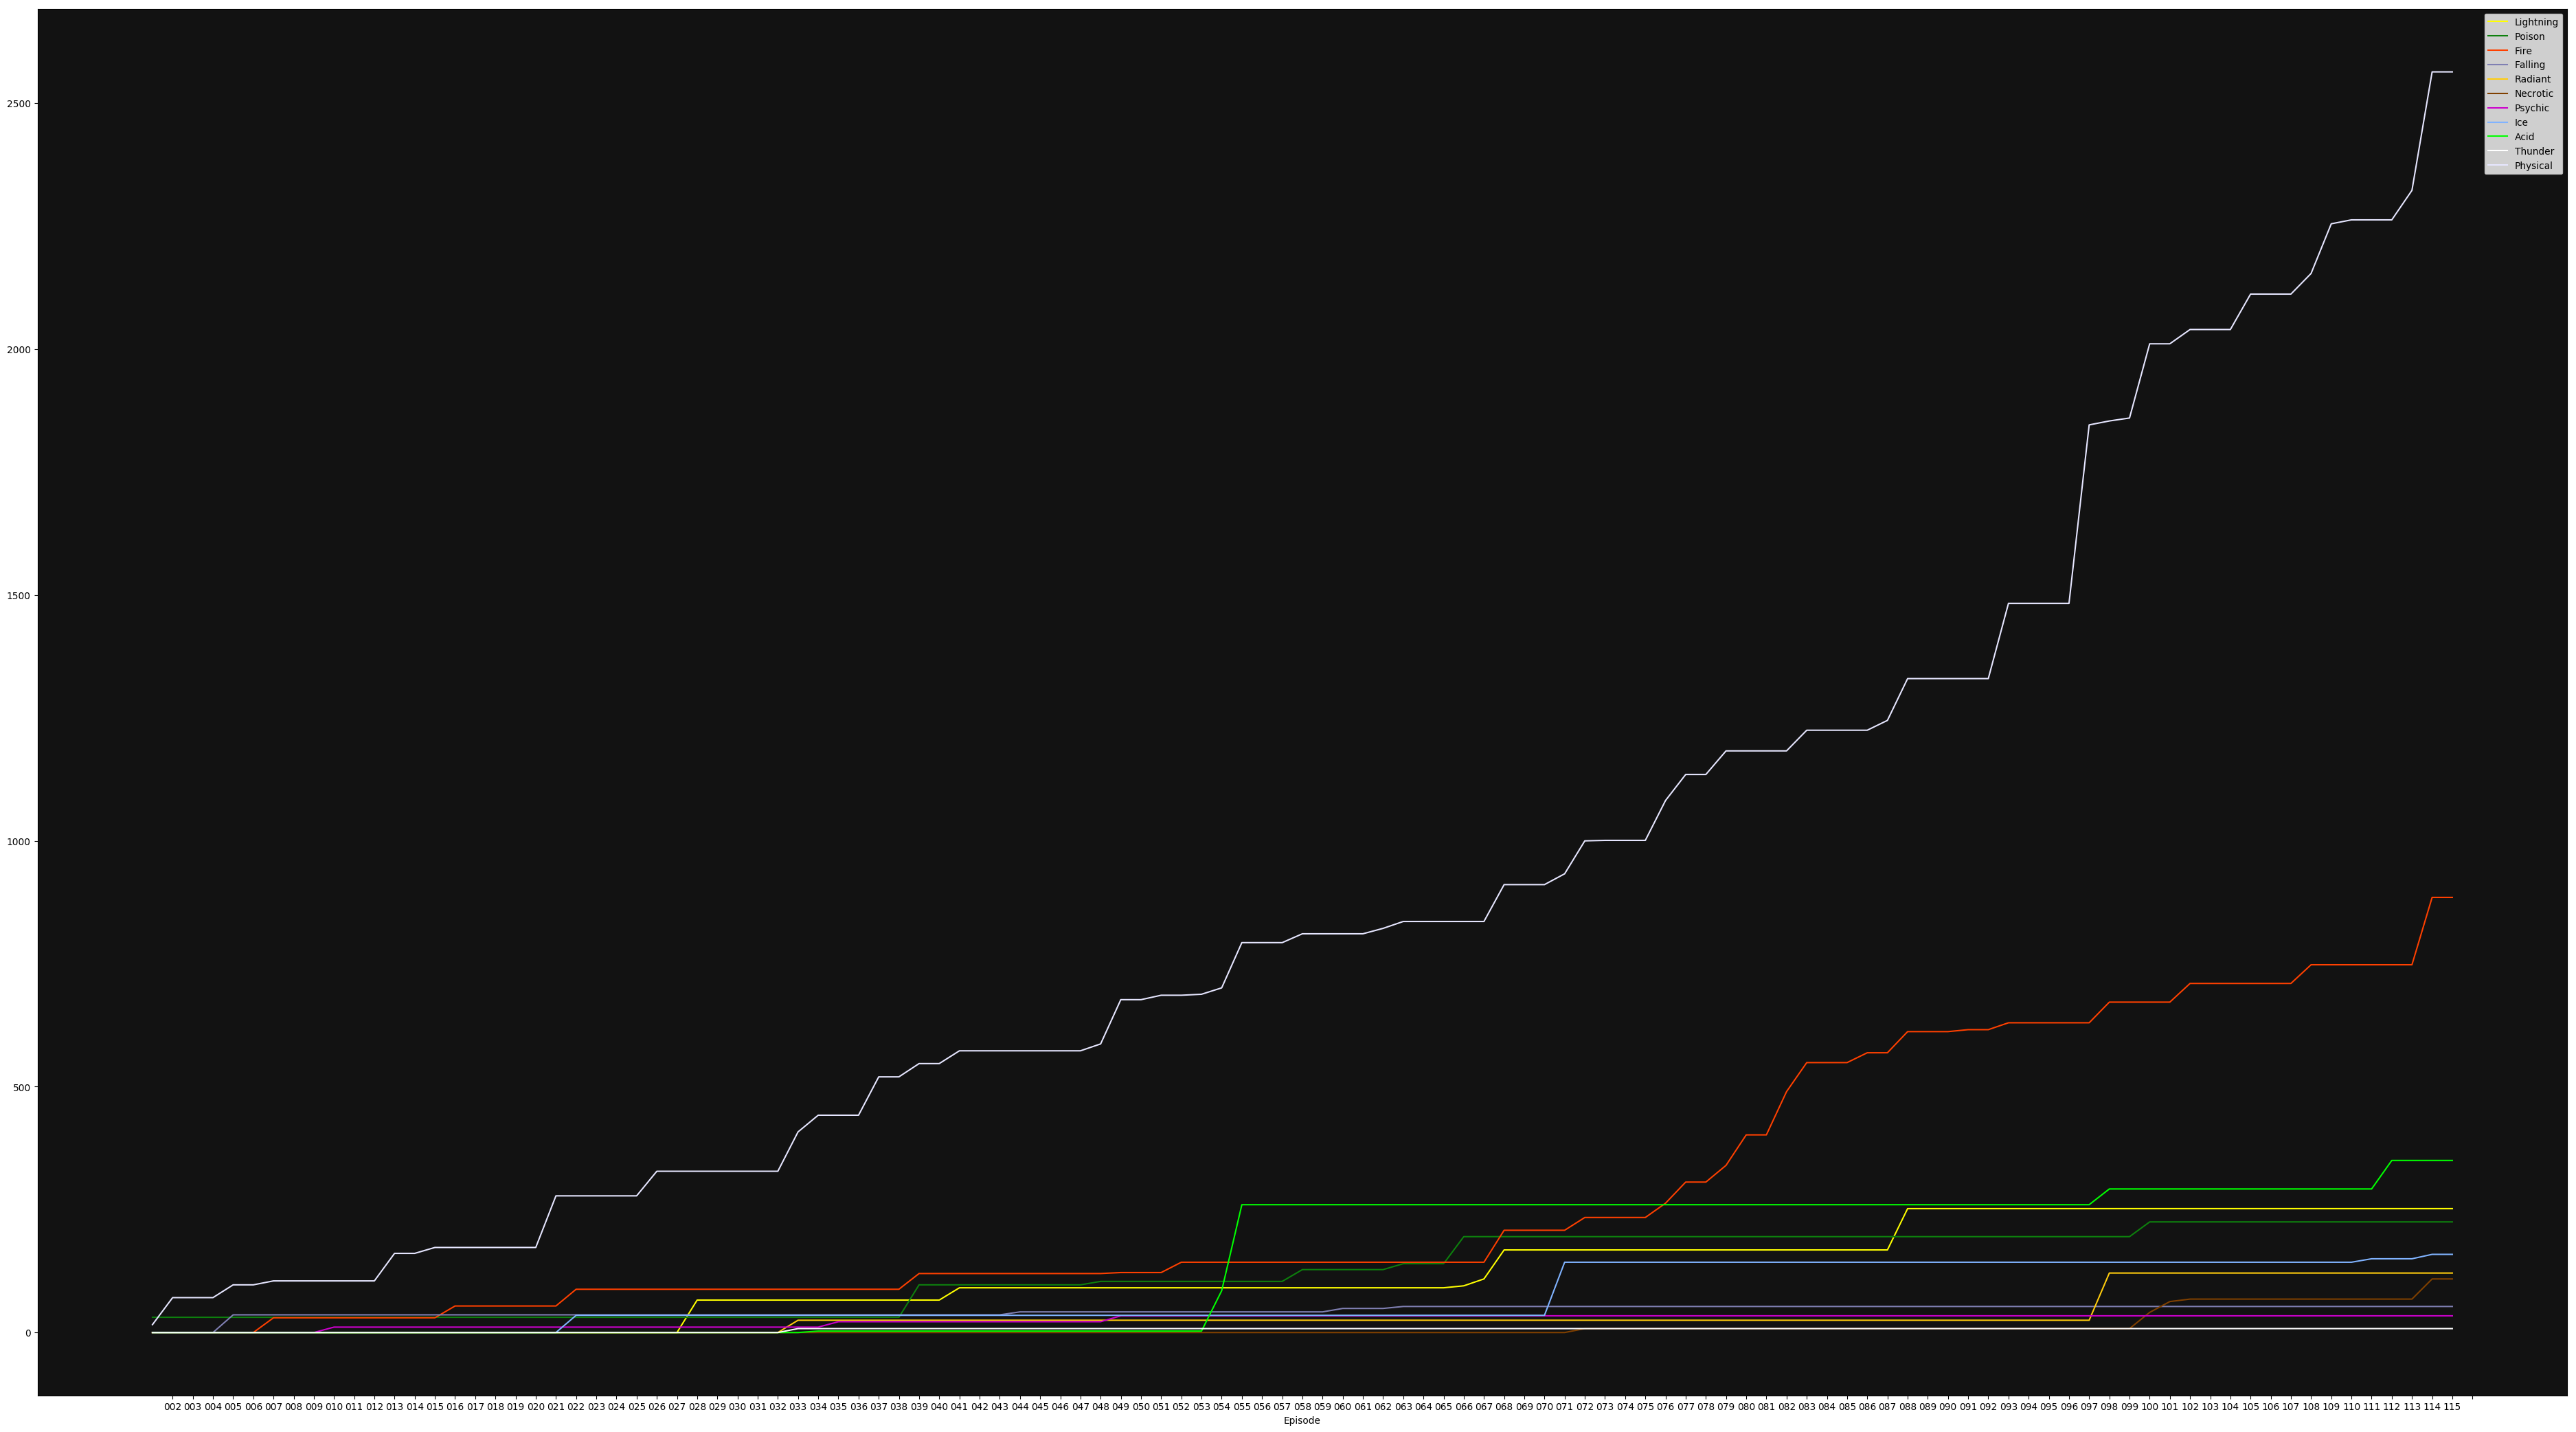

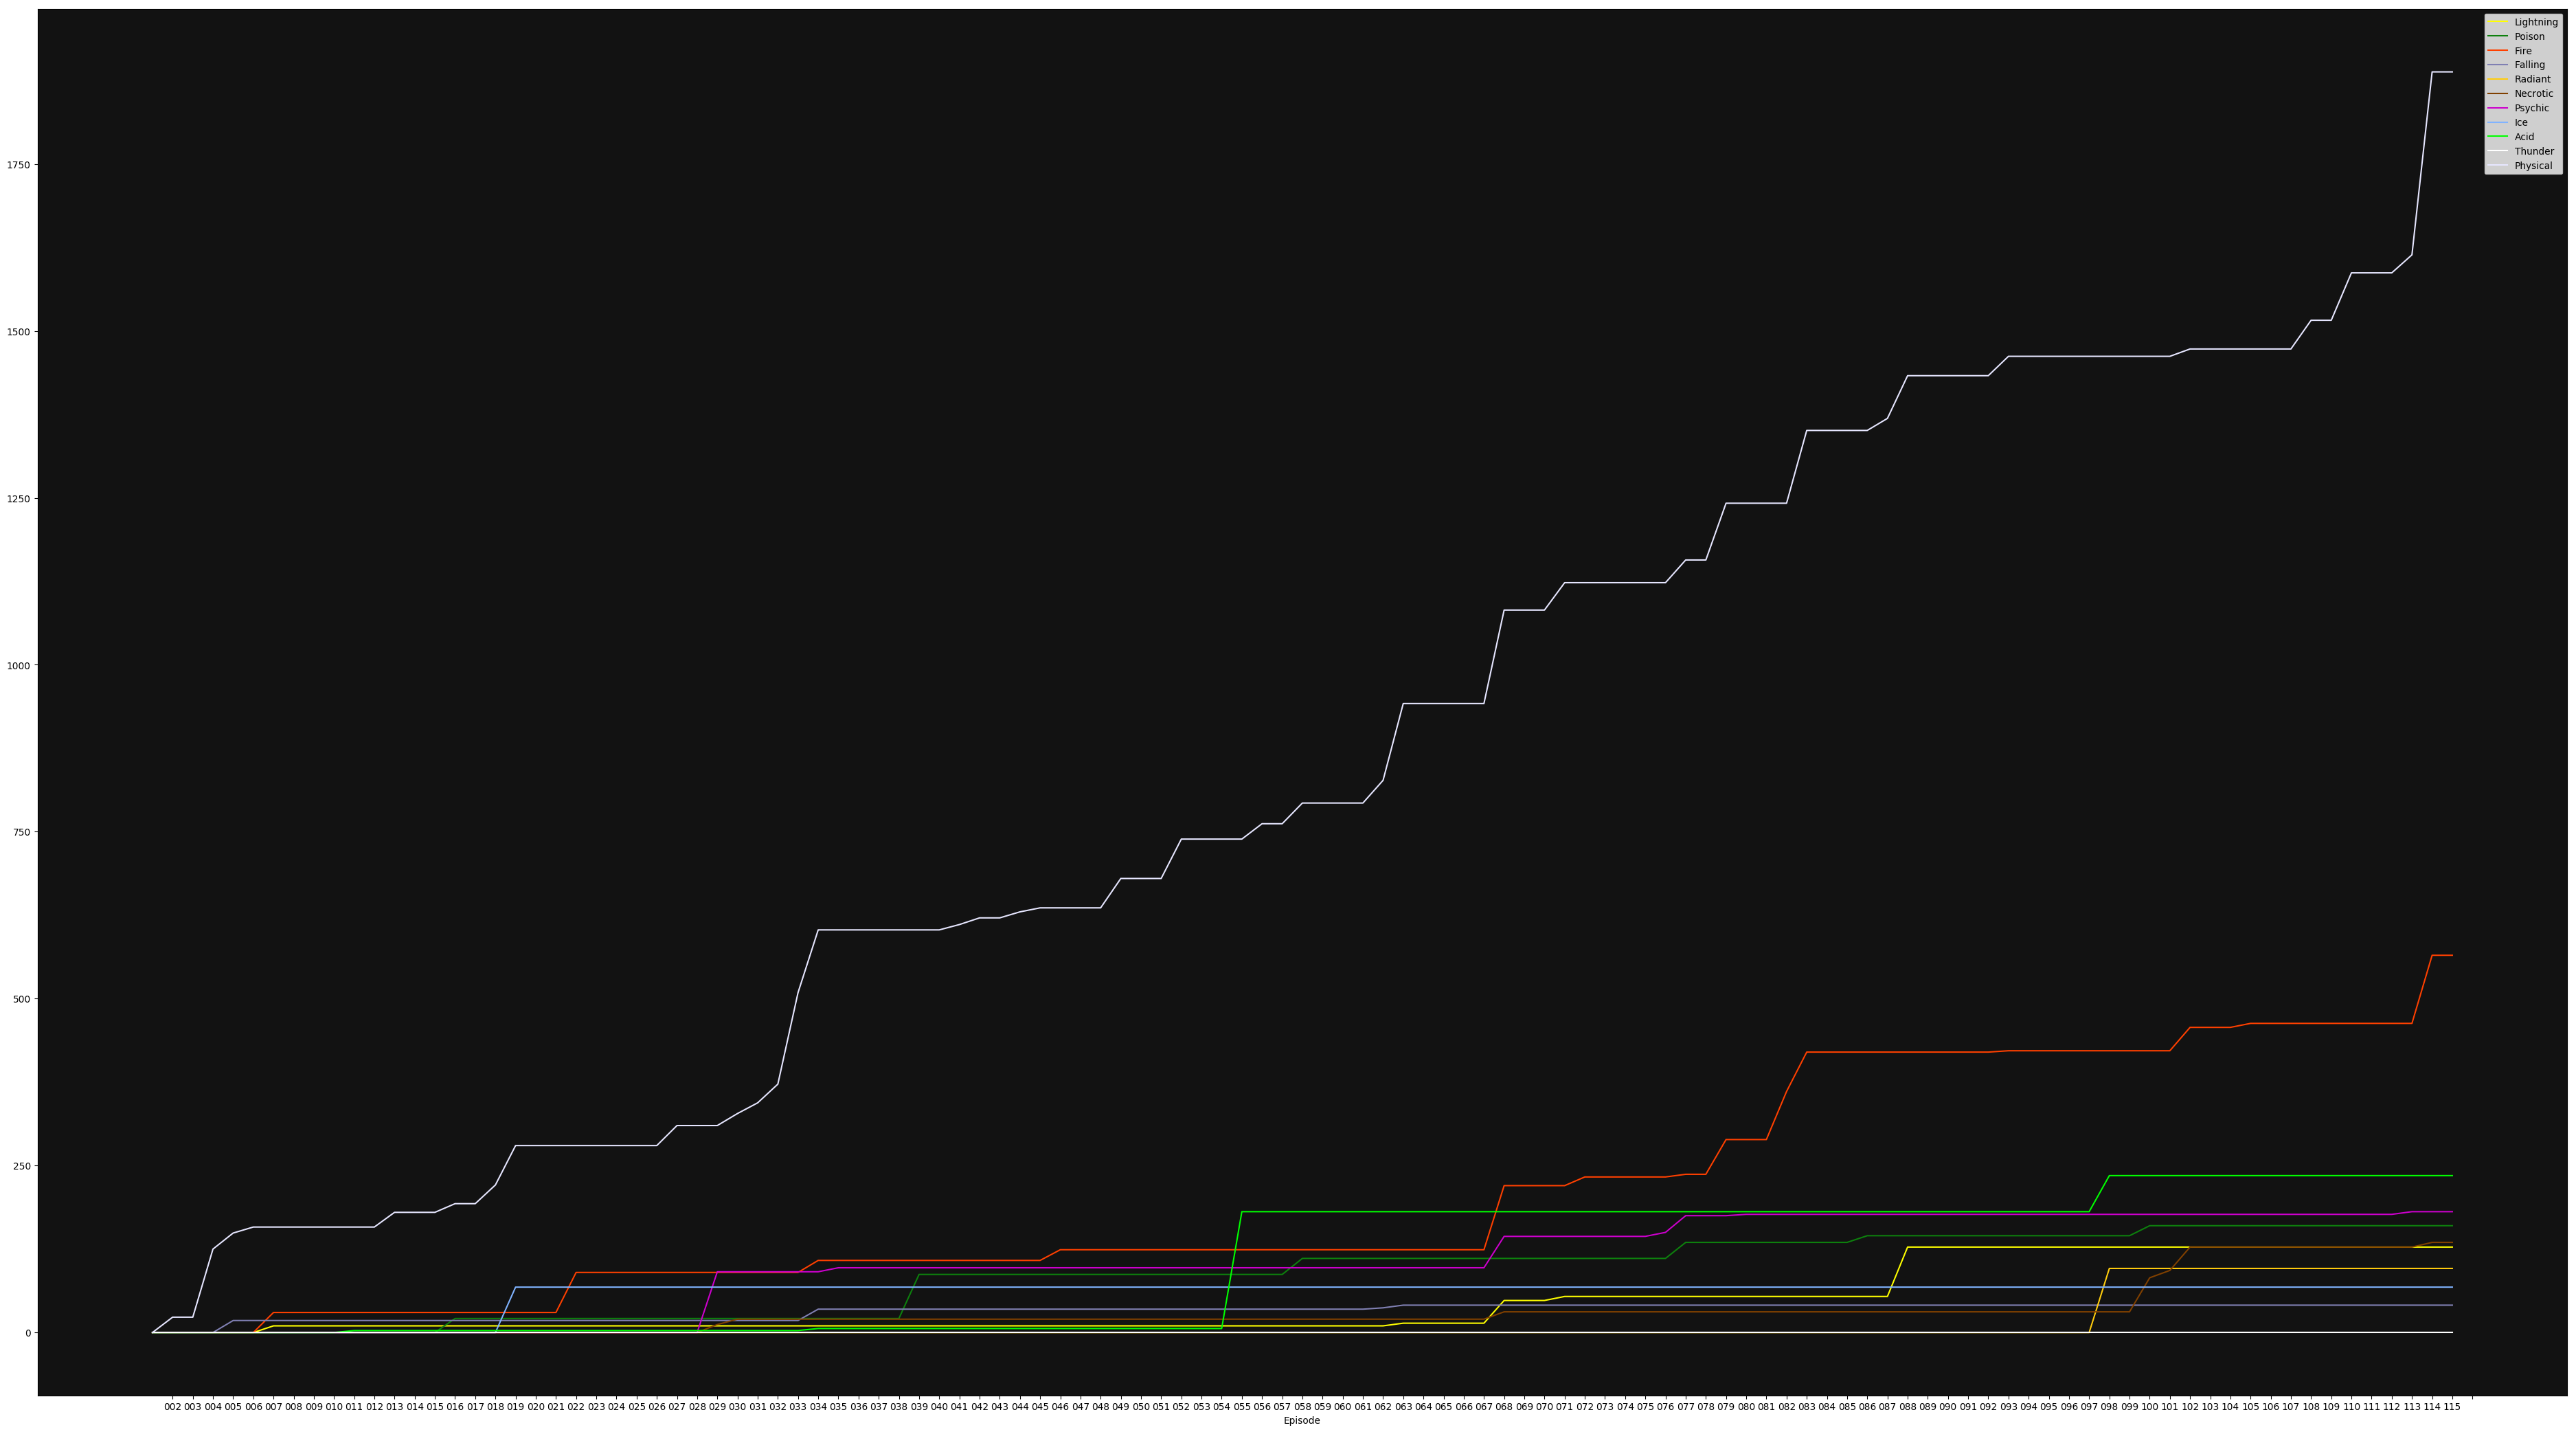

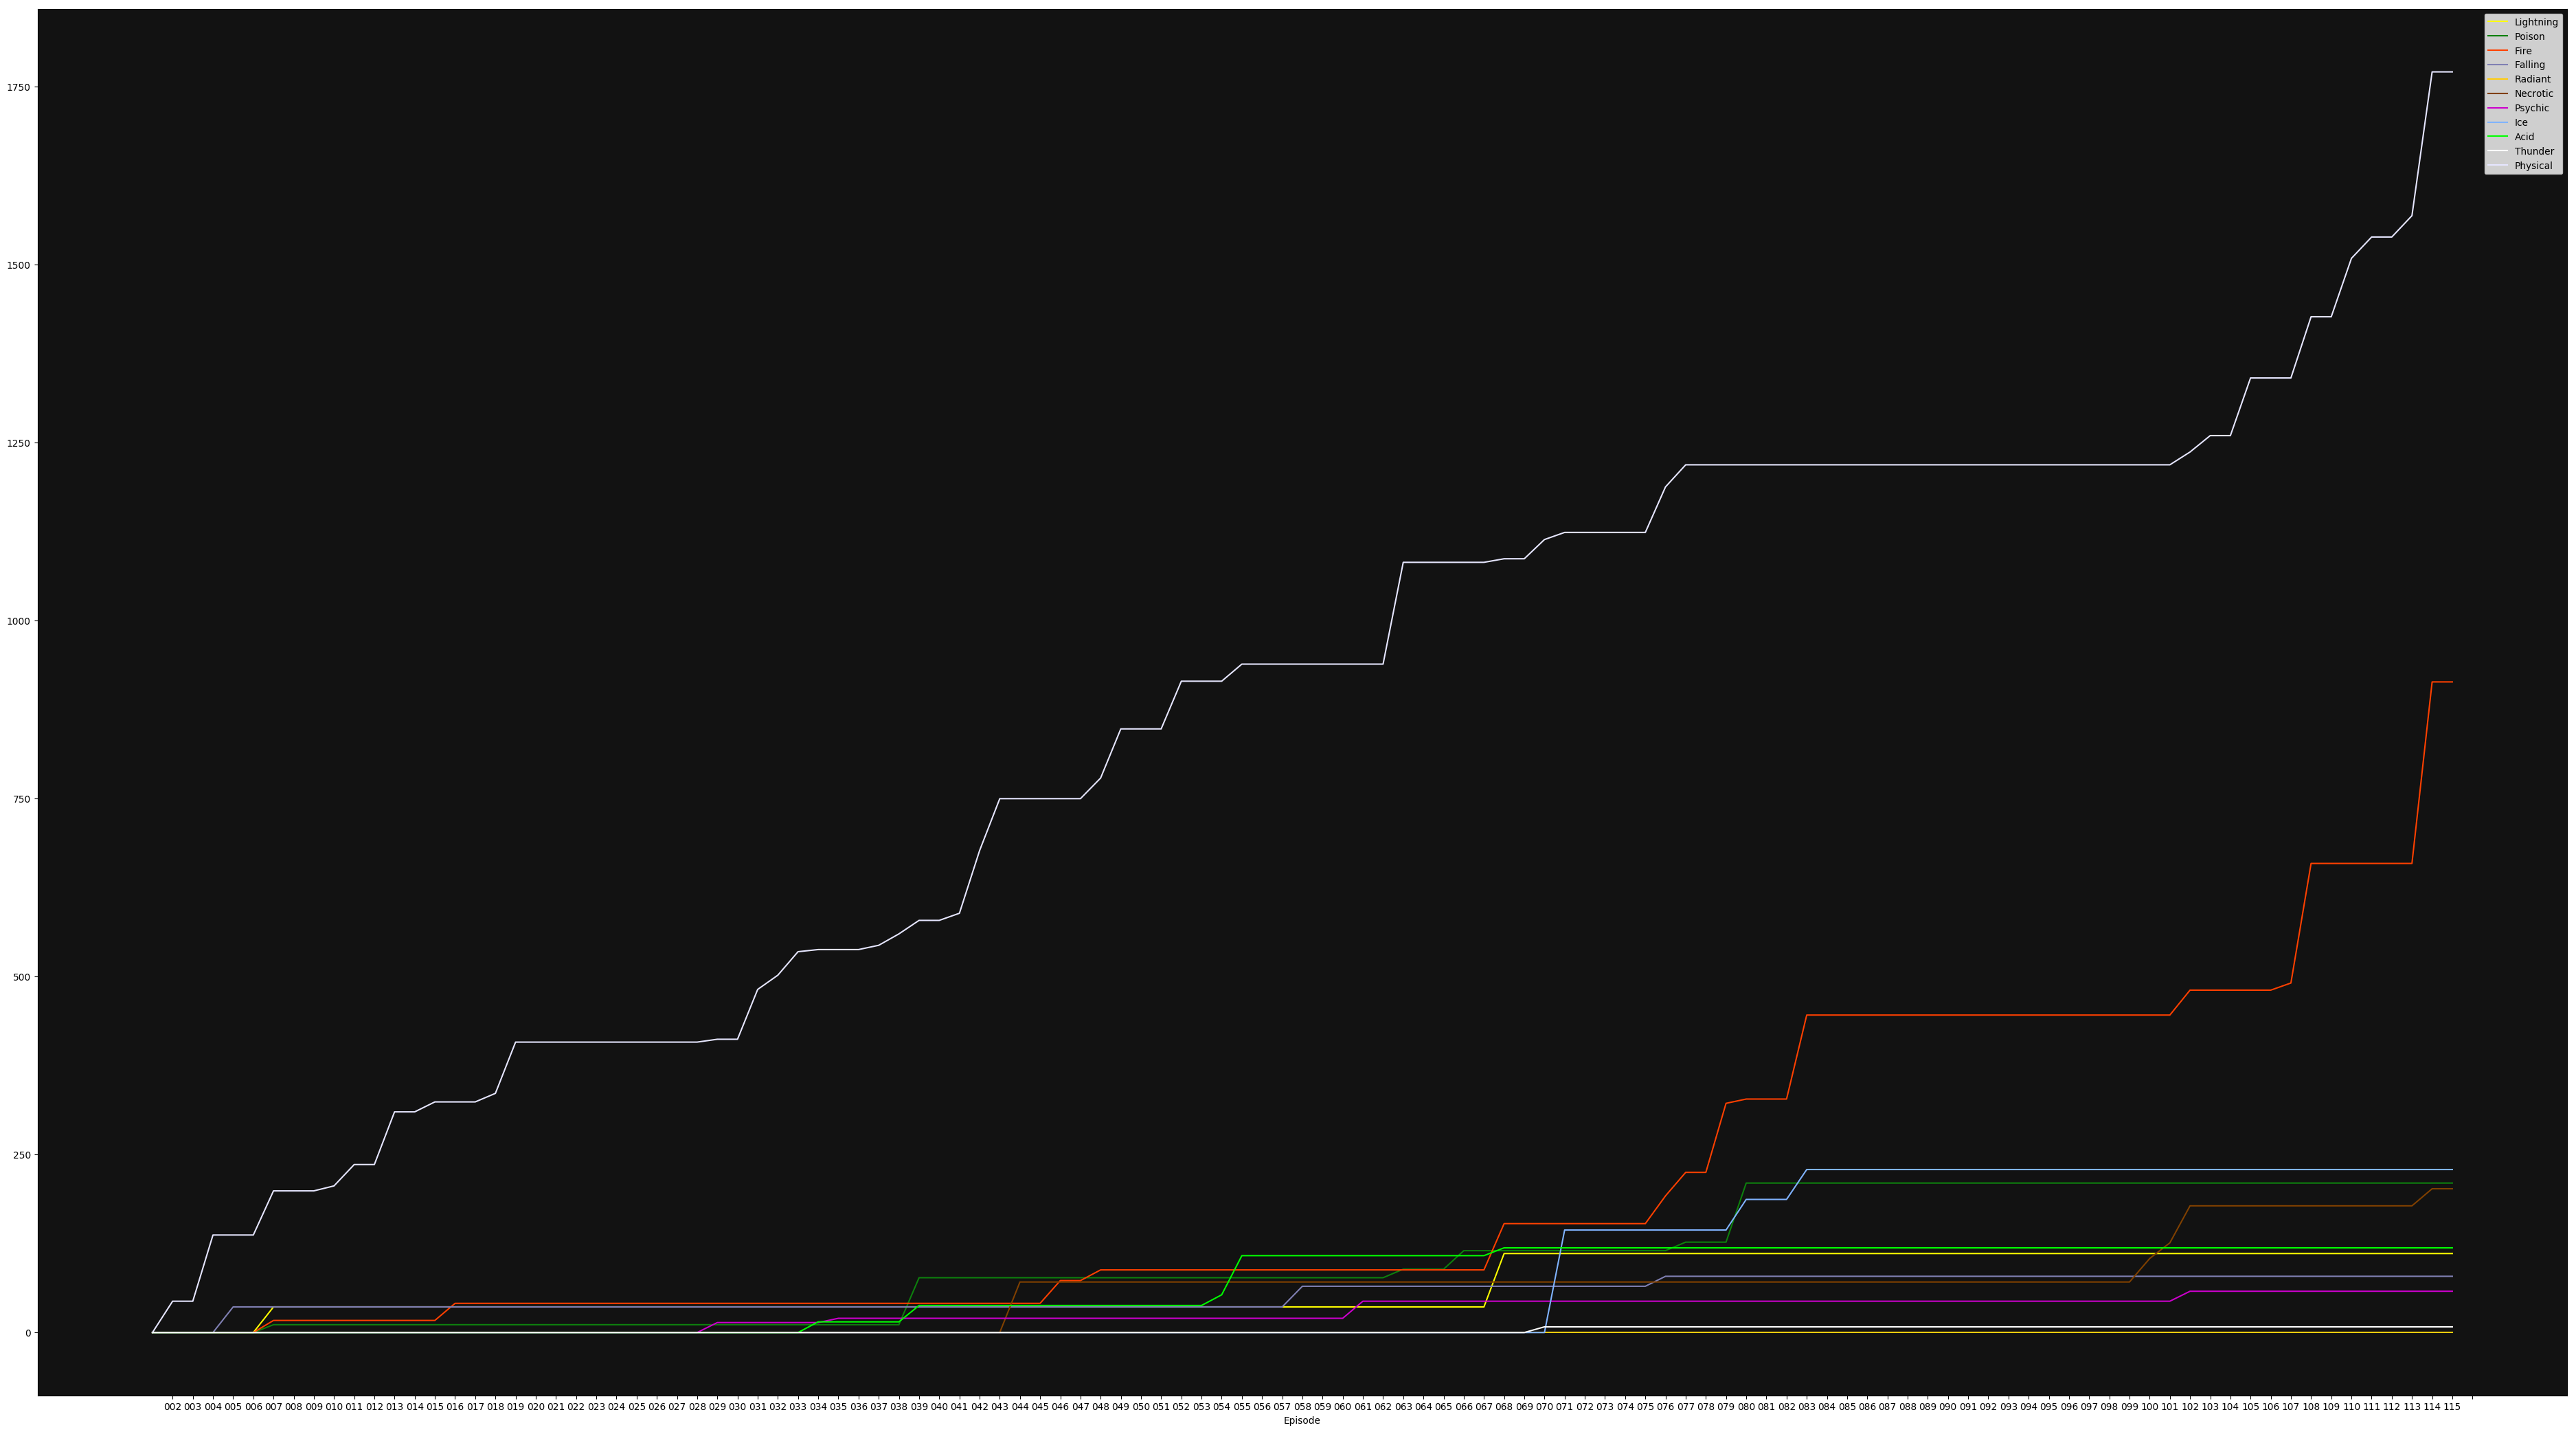

In [22]:
for i in range(0,7):
    print(chararr[i])
    ll = plt.figure(dpi=99)#;, facecolor='w', edgecolor='k')
    #plt.figure(figsize=(20,10))
    indexvalues = [int(x) for x in accmData[i].index.values]
    #print(indexvalues)
    #print(accmData[0].cumsum())
    gplt = accmData[i].cumsum().plot(ax = plt.gca(), figsize=(48,27), xticks=indexvalues, colormap=CustomCmap)
    gplt.set_facecolor('#121212')
    gplt.plot()
    plt.savefig("out/" + chararr[i] + ".line.png")

    #plt.show()
    #.area(stacked=True)

Vex
Trinket
Vax
Grog
Keyleth
Percy
Scanlan


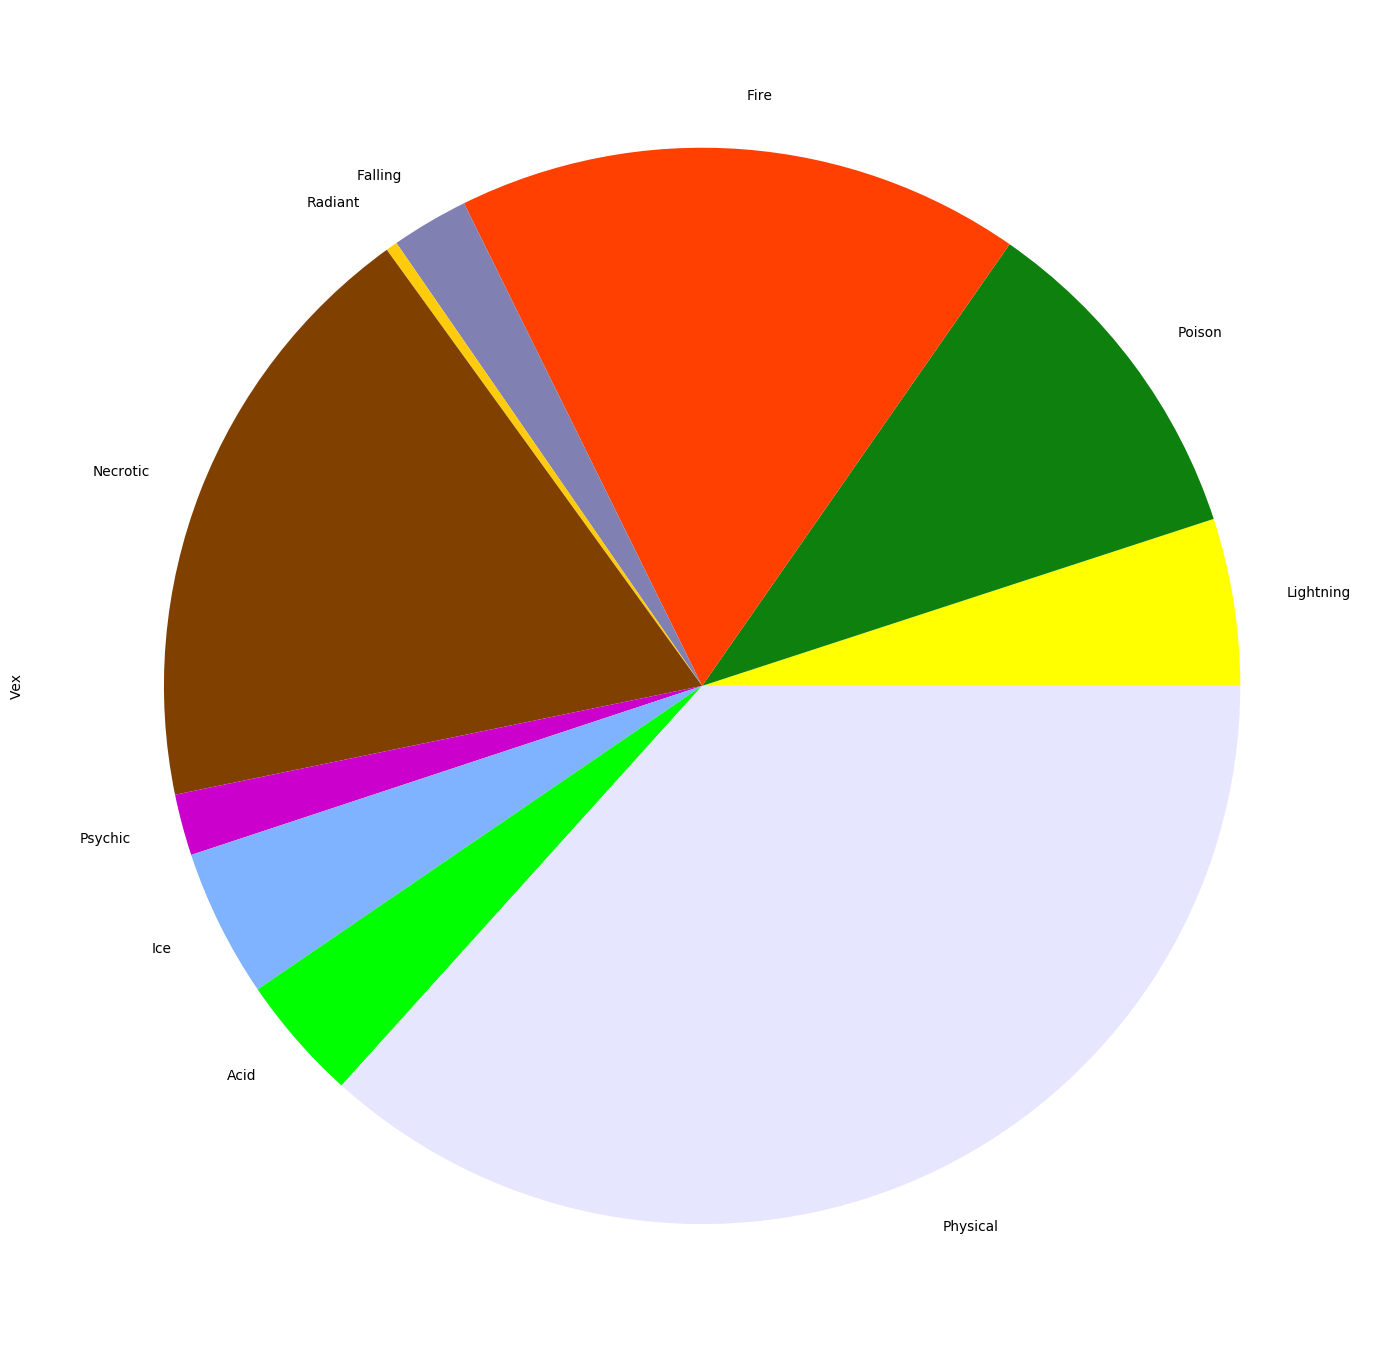

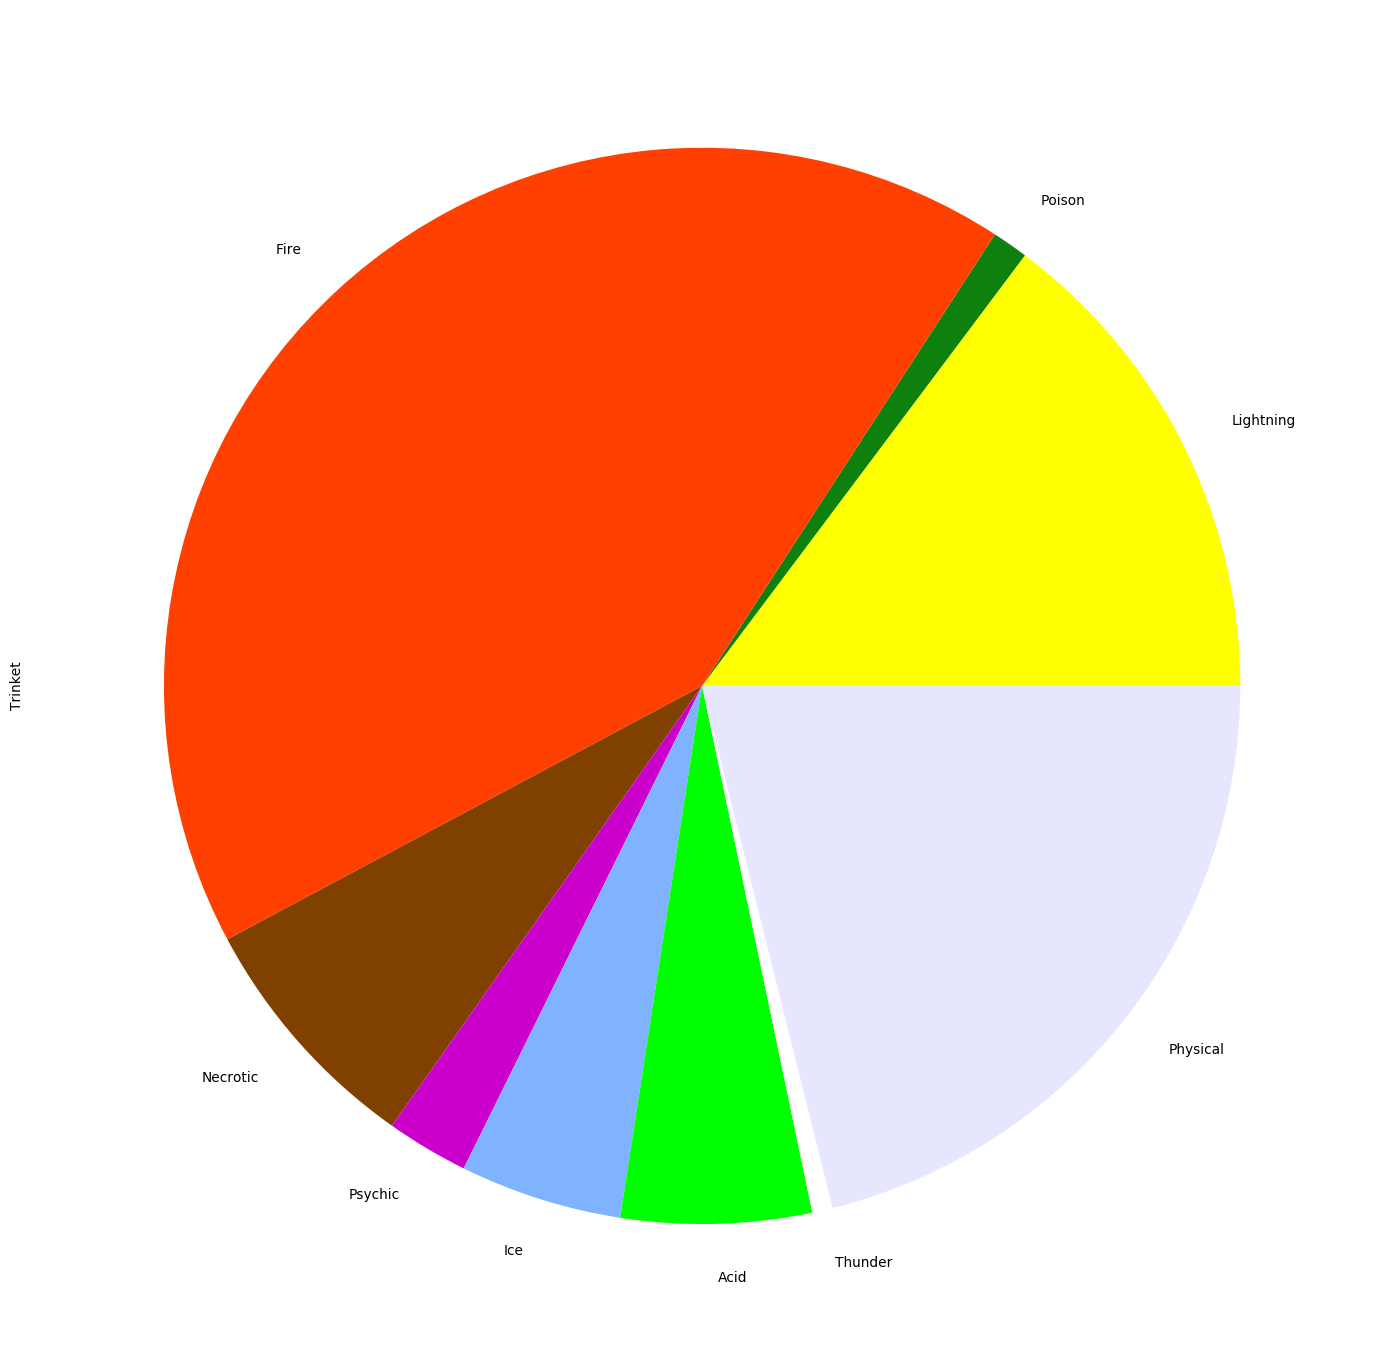

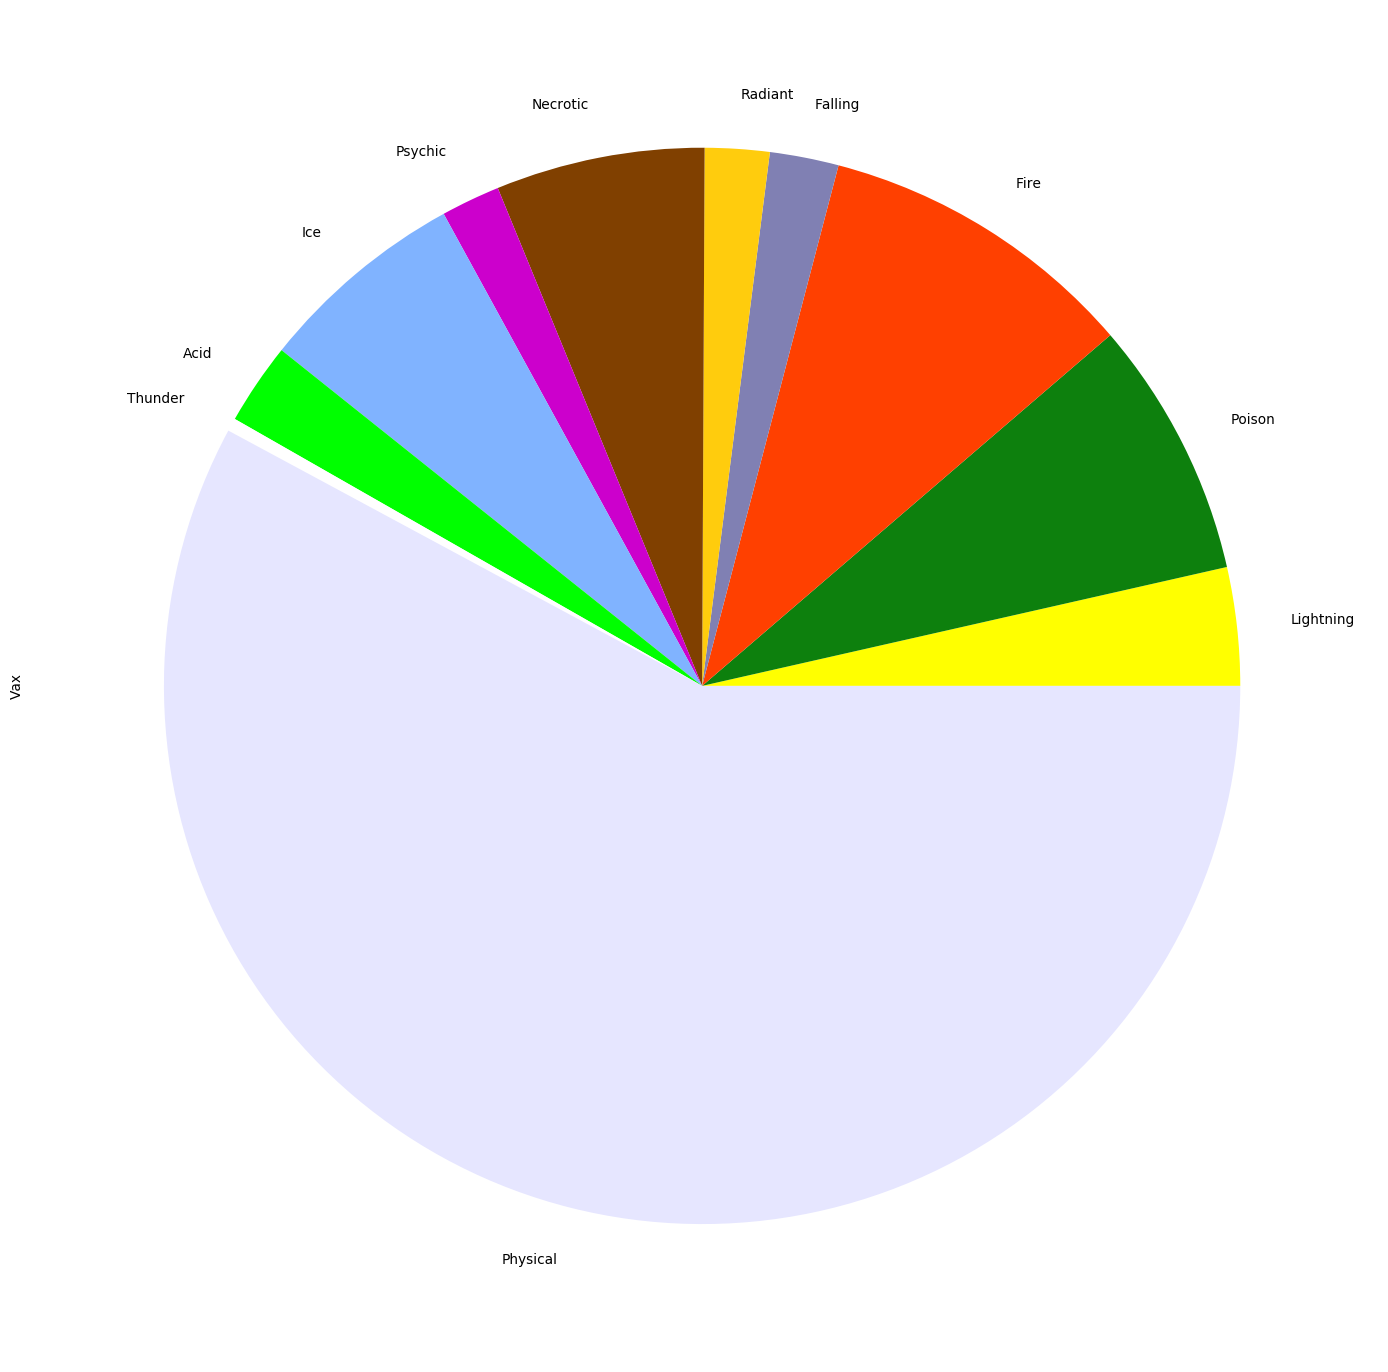

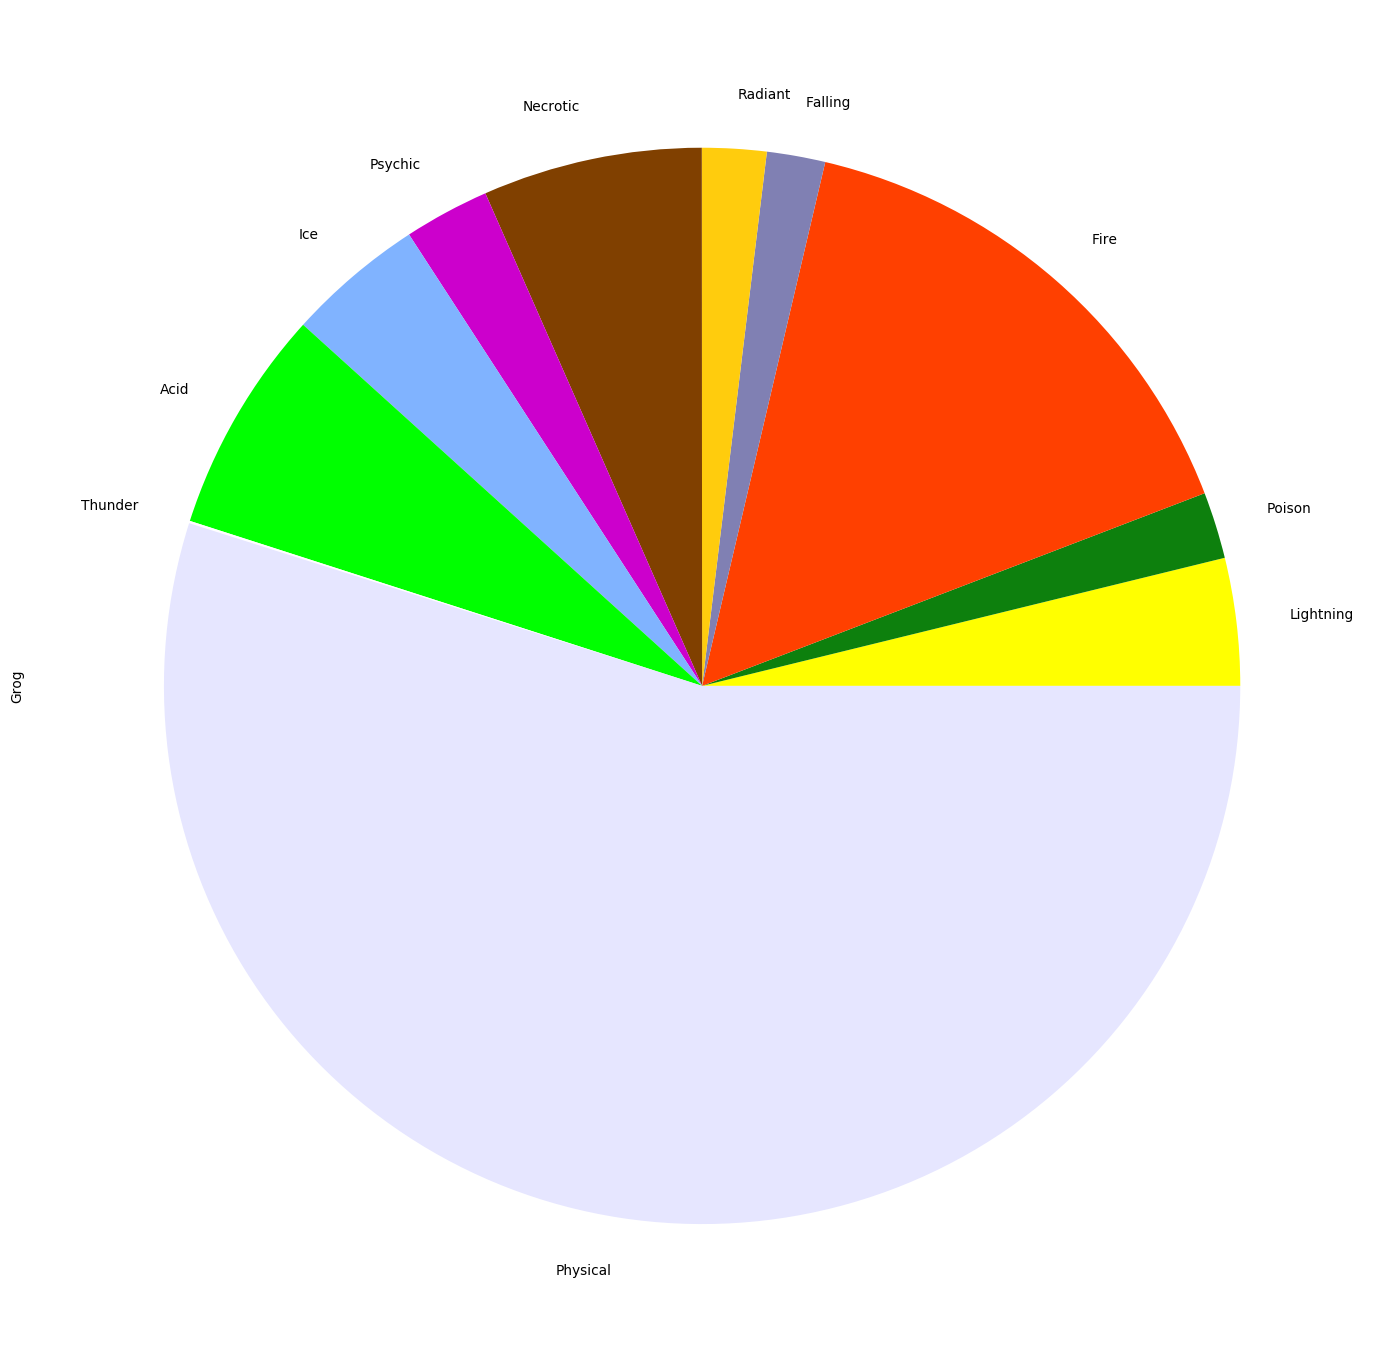

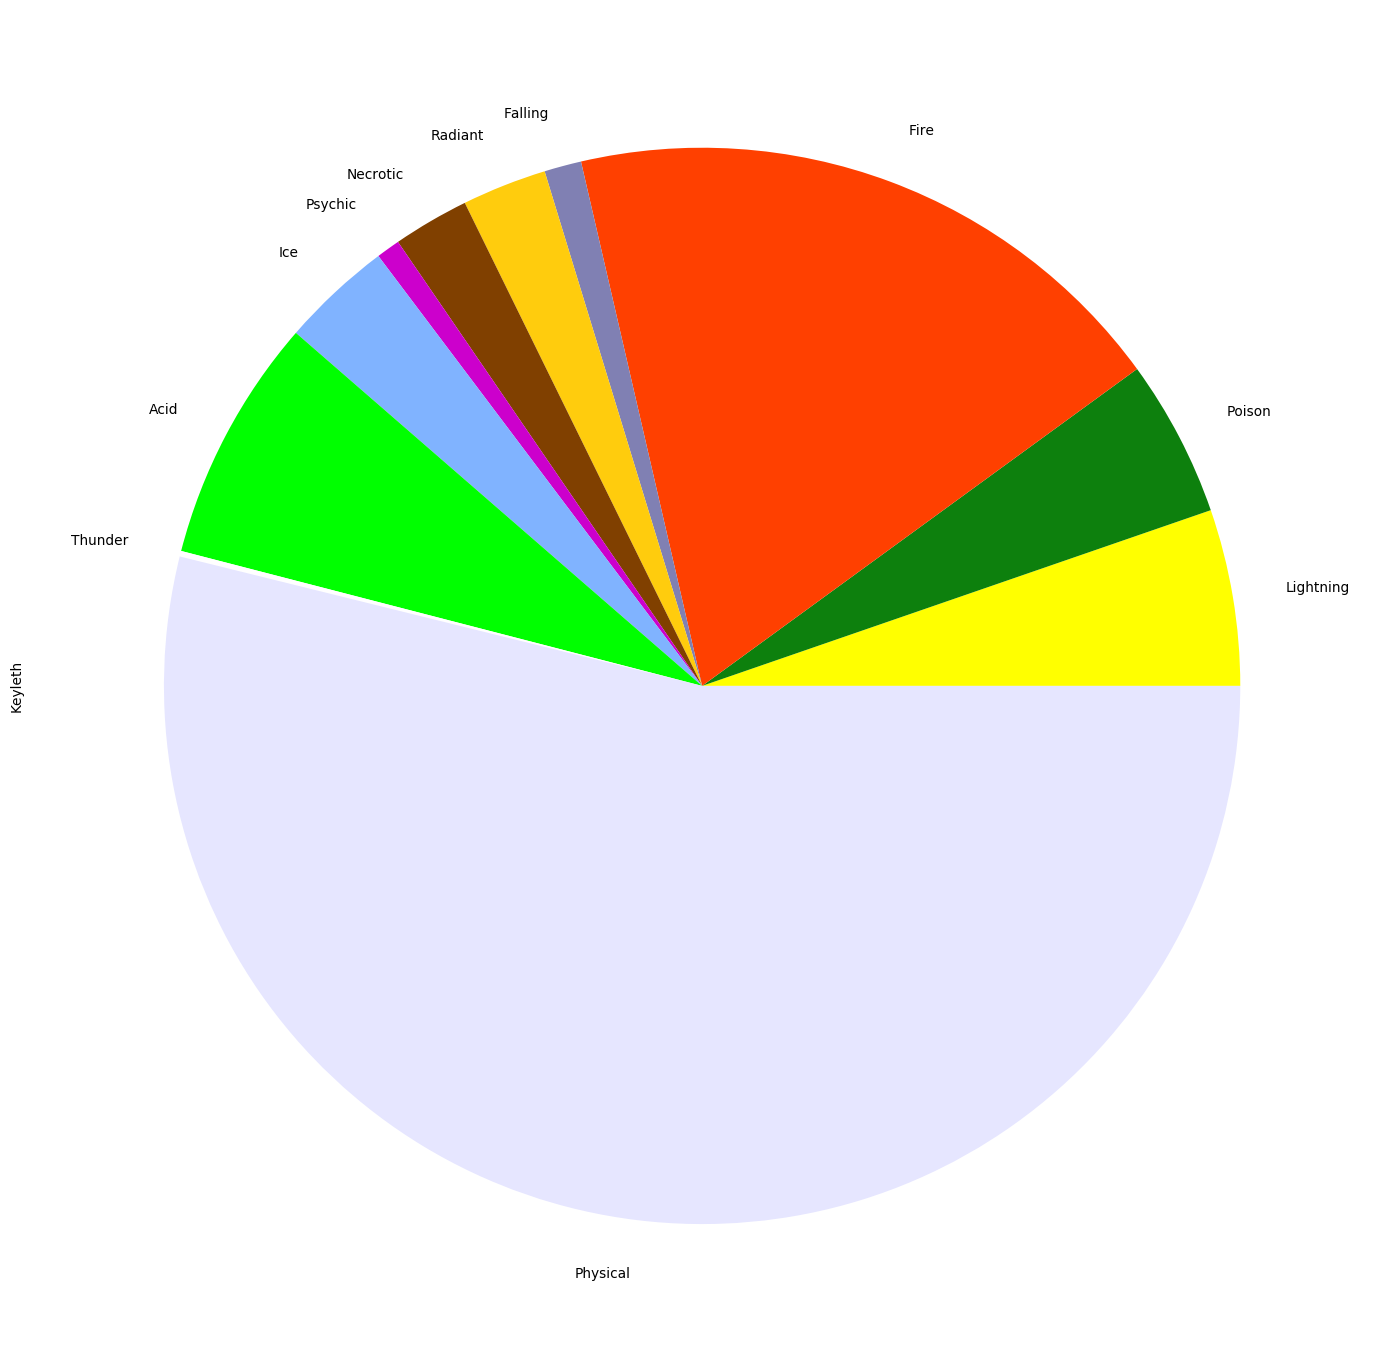

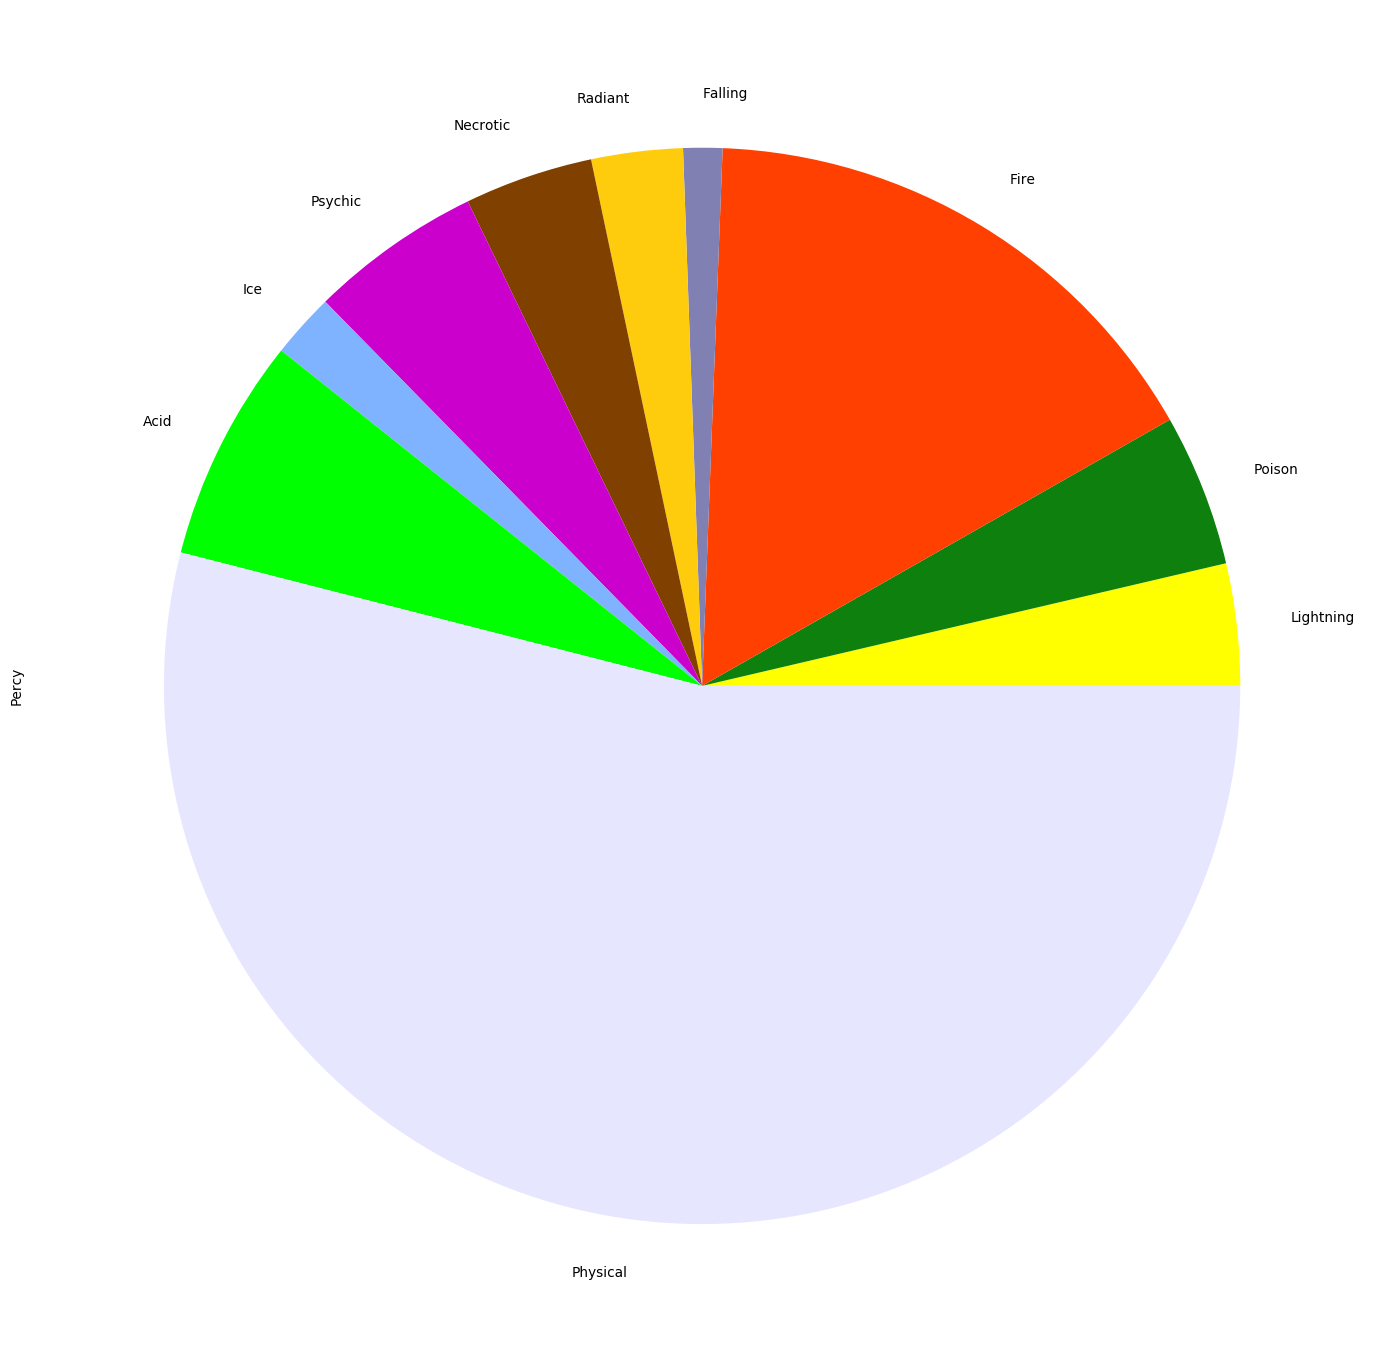

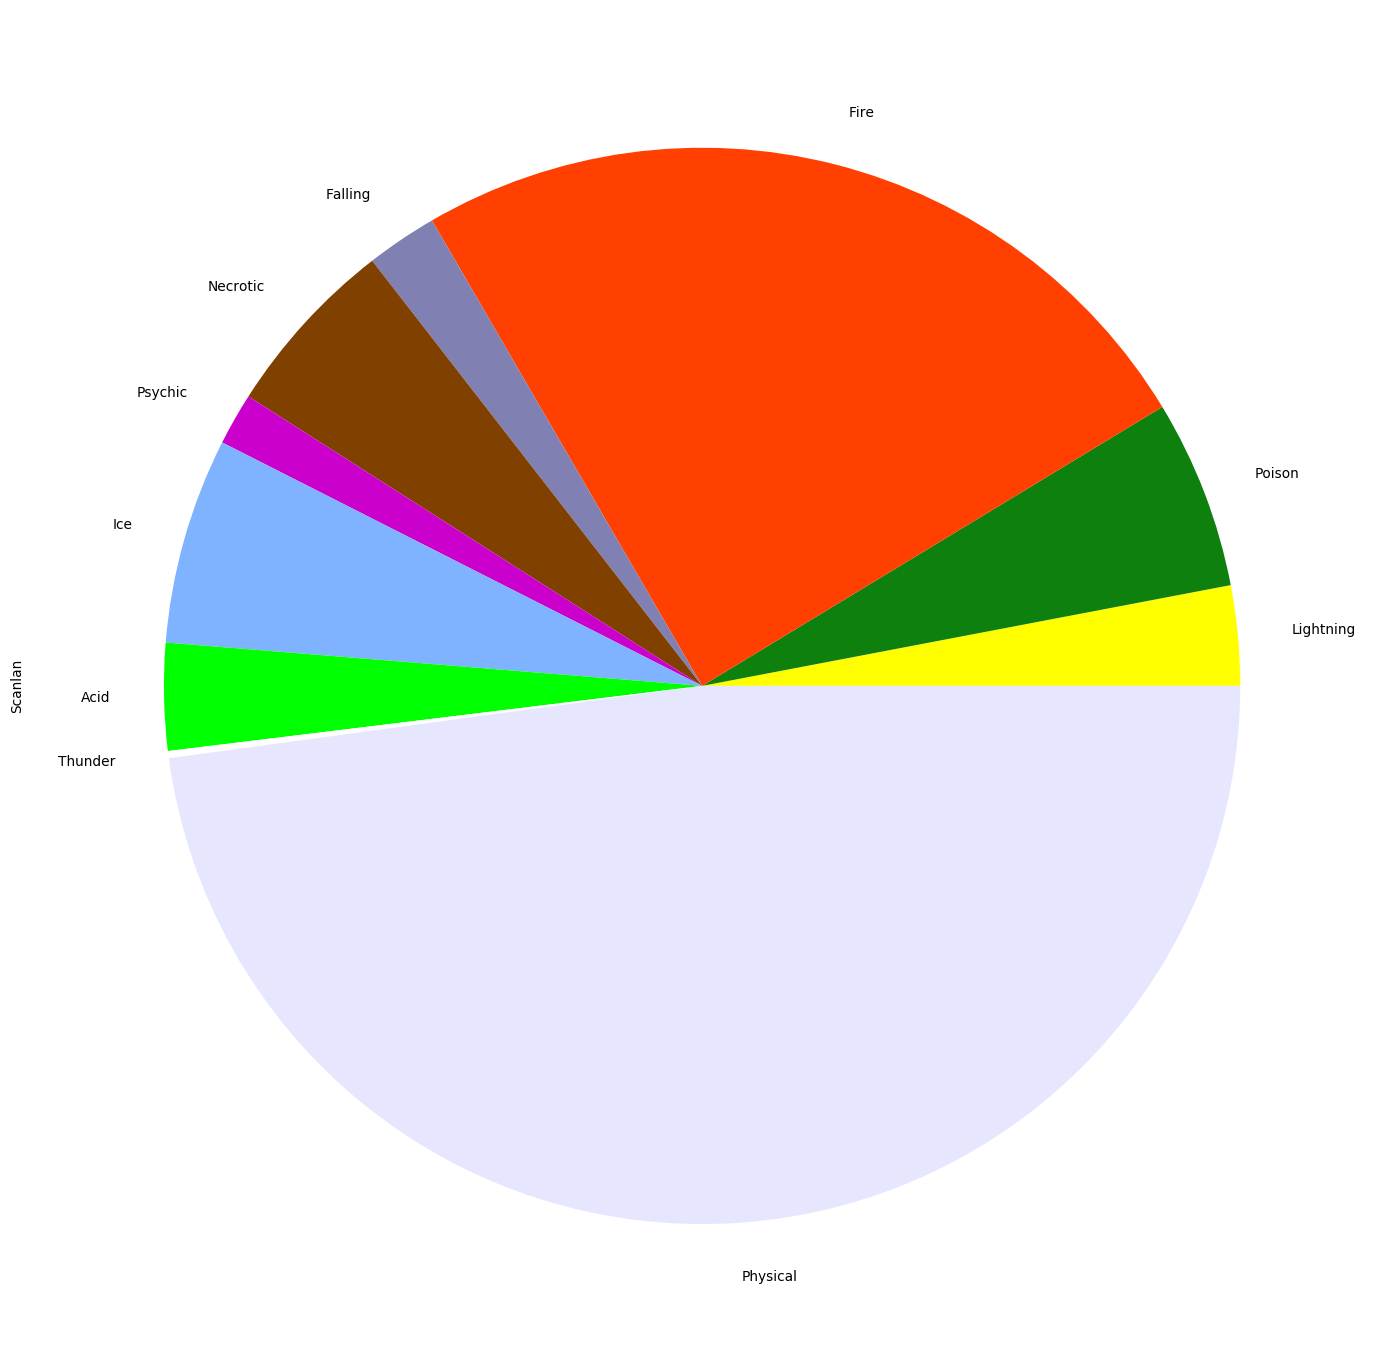

In [21]:
for i in range(0,7):
    print(chararr[i])
    ll = plt.figure(dpi=99)#;, facecolor='w', edgecolor='k')
    #plt.figure(figsize=(20,10))
    #gplt = accmData[0].plot.area(stacked=True, figsize=(48,27), colormap="tab20c")
    gplt = accmData[i].cumsum().iloc[[114]].rename(index={'115': chararr[i]}).squeeze().plot.pie(ax = plt.gca(), stacked=False, figsize=(32,18), colormap=CustomCmap)
    gplt.set_facecolor('#121212')
    gplt.plot()
    plt.savefig("out/" + chararr[i] + ".pie.png")


In [6]:
indexvalues = [int(x) for x in accmData[0].index.values]
for i in range(0,113):
    print(str(i + 1) + " : " + str(indexvalues[i]))
    

1 : 1
2 : 2
3 : 3
4 : 4
5 : 5
6 : 6
7 : 7
8 : 8
9 : 9
10 : 10
11 : 11
12 : 12
13 : 13
14 : 14
15 : 15
16 : 16
17 : 17
18 : 18
19 : 19
20 : 20
21 : 21
22 : 22
23 : 23
24 : 24
25 : 25
26 : 26
27 : 27
28 : 28
29 : 29
30 : 30
31 : 31
32 : 32
33 : 33
34 : 34
35 : 35
36 : 36
37 : 37
38 : 38
39 : 39
40 : 40
41 : 41
42 : 42
43 : 43
44 : 44
45 : 45
46 : 46
47 : 47
48 : 48
49 : 49
50 : 50
51 : 51
52 : 52
53 : 53
54 : 54
55 : 55
56 : 56
57 : 57
58 : 58
59 : 59
60 : 60
61 : 61
62 : 62
63 : 63
64 : 64
65 : 65
66 : 66
67 : 67
68 : 68
69 : 69
70 : 70
71 : 71
72 : 72
73 : 73
74 : 74
75 : 75
76 : 76
77 : 77
78 : 78
79 : 79
80 : 80
81 : 81
82 : 82
83 : 83
84 : 84
85 : 85
86 : 86
87 : 87
88 : 88
89 : 89
90 : 90
91 : 91
92 : 92
93 : 93
94 : 94
95 : 95
96 : 96
97 : 97
98 : 98
99 : 99
100 : 100
101 : 101
102 : 102
103 : 103
104 : 104
105 : 105
106 : 106
107 : 107
108 : 108
109 : 109
110 : 110
111 : 111
112 : 112
113 : 113
